In [1]:
#Can ignore for now
import torch
torch.cuda.is_available()

False

In [2]:
# Download dataset
# !wget -P data/full_dataset/ https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_1.csv
# !wget -P data/full_dataset/ https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_2.csv
# !wget -P data/full_dataset/ https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_3.csv

In [3]:
import os
import pandas as pd

filepath = 'data/full_dataset'    #can provide runtime too thorugh arguments

filenames = []
for file in os.listdir(filepath):
    if file.endswith(".csv"):
        filenames.append("".join(filepath+"/"+file))
        print(file)

go_emotion_df = pd.concat(map(pd.read_csv, filenames))

goemotions_1.csv
goemotions_2.csv
goemotions_3.csv


In [4]:
go_emotion_df.head()

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,1.548381e+09,1,False,0,...,0,0,0,0,0,0,0,1,0,0
1,>sexuality shouldn’t be a grouping category I...,eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,1.548084e+09,37,True,0,...,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,1.546428e+09,37,False,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,1.547965e+09,18,False,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",eda6yn6,American_Fascist713,starwarsspeculation,t3_ackt2f,t1_eda65q2,1.546669e+09,2,False,0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
go_emotion_df.columns

Index(['text', 'id', 'author', 'subreddit', 'link_id', 'parent_id',
       'created_utc', 'rater_id', 'example_very_unclear', 'admiration',
       'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion',
       'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust',
       'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy',
       'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief',
       'remorse', 'sadness', 'surprise', 'neutral'],
      dtype='object')

In [6]:
#check the shape of dataset
# 

go_emotion_df.shape

(211225, 37)

Above shape shows that it's raw data, we need to only use simplified data

Let's load the data from "https://huggingface.co/datasets/go_emotions/viewer/simplified/train" 
It'll provide simplified version of go emotions data

In [2]:
!pip install datasets

     -------------------------------------- 474.6/474.6 kB 9.9 MB/s eta 0:00:00
     --------------------------------------- 21.5/21.5 MB 12.4 MB/s eta 0:00:00
  Using cached responses-0.18.0-py3-none-any.whl (38 kB)
  Using cached dill-0.3.6-py3-none-any.whl (110 kB)
  Using cached xxhash-3.2.0-cp39-cp39-win_amd64.whl (30 kB)
  Using cached multiprocess-0.70.14-py39-none-any.whl (132 kB)
  Using cached aiohttp-3.8.4-cp39-cp39-win_amd64.whl (323 kB)
  Using cached aiosignal-1.3.1-py3-none-any.whl (7.6 kB)
  Using cached attrs-23.1.0-py3-none-any.whl (61 kB)
  Using cached frozenlist-1.3.3-cp39-cp39-win_amd64.whl (34 kB)
  Using cached async_timeout-4.0.2-py3-none-any.whl (5.8 kB)
  Using cached multidict-6.0.4-cp39-cp39-win_amd64.whl (28 kB)
     ---------------------------------------- 61.7/61.7 kB ? eta 0:00:00


In [3]:
from datasets import load_dataset
import random
import string
import re
import numpy as np
import seaborn as sns

import pandas as pd
pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
go_emotion_simplified = load_dataset('go_emotions')

No config specified, defaulting to: go_emotions/simplified
Found cached dataset go_emotions (C:/Users/deepe/.cache/huggingface/datasets/go_emotions/simplified/0.0.0/2637cfdd4e64d30249c3ed2150fa2b9d279766bfcd6a809b9f085c61a90d776d)


  0%|          | 0/3 [00:00<?, ?it/s]

In [5]:
display(go_emotion_simplified)

DatasetDict({
    train: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 43410
    })
    validation: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 5426
    })
    test: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 5427
    })
})

In [6]:
## Setting number of labels
num_label_new = 14

In [7]:
# go_emotion_simplified_train = pd.DataFrame(go_emotion_simplified['train'])   ## While execution took more time
go_emotion_simplified_train_n = go_emotion_simplified['train'].to_pandas()   ## Lesser execution time

In [8]:
go_emotion_simplified_train_n.head(5)

,text,labels,id
0,My favourite food is anything I didn't have to...,[27],eebbqej
1,"Now if he does off himself, everyone will thin...",[27],ed00q6i
2,WHY THE FUCK IS BAYLESS ISOING,[2],eezlygj
3,To make her feel threatened,[14],ed7ypvh
4,Dirty Southern Wankers,[3],ed0bdzj


#### There are three columns in simplified dataset 
text , labels and id

In [9]:
# Number of labels assigned to text
go_emotion_simplified_train_n['labels_count'] = go_emotion_simplified_train_n['labels'].apply(lambda x: len(x))

In [10]:
# let's look at different number of labels assigned to text
# go_emotion_simplified_train['labels_count'].value_counts() ... referenced - https://www.kaggle.com/code/debarshichanda/goemotions-starter-notebook-with-basic-eda

go_emotion_simplified_train_n.groupby(['labels_count']).agg("count")['text']


labels_count
1    36308
2     6541
3      532
4       28
5        1
Name: text, dtype: int64

View the labels assignment of text into graph

<Axes: xlabel='labels_count'>

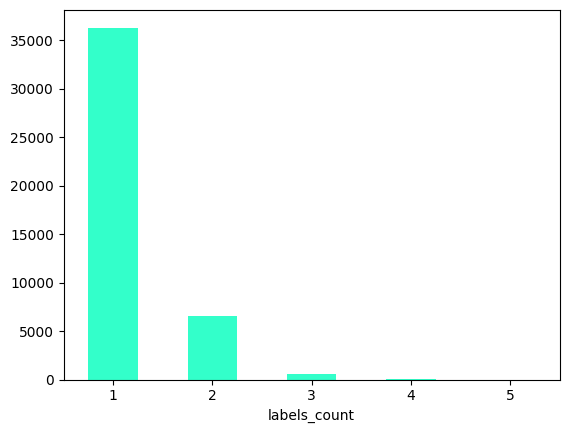

In [11]:
go_emotion_simplified_train_n.groupby(['labels_count']).agg("count")['text'].plot.bar(rot=0, color = '#33FFCA')

In [12]:
# Referenced --  https://huggingface.co/datasets/go_emotions/blob/main/README.md
# Get the labels name

text_labels = """ 0: admiration
        1: amusement
        2: anger
        3: annoyance
        4: approval
        5: caring
        6: confusion
        7: curiosity
        8: desire
        9: disappointment
        10: disapproval
        11: disgust
        12: embarrassment
        13: excitement
        14: fear
        15: gratitude
        16: grief
        17: joy
        18: love
        19: nervousness
        20: optimism
        21: pride
        22: realization
        23: relief
        24: remorse
        25: sadness 
        26: surprise
        27: neutral"""

labels_dict_n = dict()

# labels_dict[int(kval.split(':')[0].strip())] = kval.split(':')[-1].strip()

for f in [kval for kval in [kv for kv in text_labels.split("\n")]]:
    labels_dict_n[int(f.split(':')[0].strip())] = f.split(':')[-1].strip()


In [13]:
# we also taking Validation set and test set into their respective variables

go_emotion_simplified_validation = go_emotion_simplified['validation'].to_pandas() 
go_emotion_simplified_test = go_emotion_simplified['test'].to_pandas()   

In [14]:
go_emotion_simplified_train_n["labels_name_class"] = go_emotion_simplified_train_n['labels'].apply(lambda x: labels_dict_n[x[0]]) # Since we have numpy arrays in labels column
go_emotion_simplified_train_n["labels_no_class"] = go_emotion_simplified_train_n['labels'].apply(lambda x: x[0]) # setting number of their columns

In [15]:
go_emotion_simplified_validation["labels_name_class"] = go_emotion_simplified_validation['labels'].apply(lambda x: labels_dict_n[x[0]]) # Since we have numpy arrays in labels column
go_emotion_simplified_validation["labels_no_class"] = go_emotion_simplified_validation['labels'].apply(lambda x: x[0]) # setting number of their columns

In [16]:
go_emotion_simplified_test["labels_name_class"] = go_emotion_simplified_test['labels'].apply(lambda x: labels_dict_n[x[0]]) # Since we have numpy arrays in labels column
go_emotion_simplified_test["labels_no_class"] = go_emotion_simplified_test['labels'].apply(lambda x: x[0]) # setting number of their columns

In [17]:
go_emotion_simplified_train = pd.concat([go_emotion_simplified_train_n,go_emotion_simplified_validation,go_emotion_simplified_test])

In [18]:
go_emotion_simplified_train.head()

,text,labels,id,labels_count,labels_name_class,labels_no_class
0,My favourite food is anything I didn't have to...,[27],eebbqej,1.0,neutral,27
1,"Now if he does off himself, everyone will thin...",[27],ed00q6i,1.0,neutral,27
2,WHY THE FUCK IS BAYLESS ISOING,[2],eezlygj,1.0,anger,2
3,To make her feel threatened,[14],ed7ypvh,1.0,fear,14
4,Dirty Southern Wankers,[3],ed0bdzj,1.0,annoyance,3


### Reduce labels to lesser number

In [19]:
## Add code for reducing label count

In [20]:
""" 0: admiration
    1: amusement
    2: anger
    3: annoyance
    4: approval
    5: caring
    6: confusion
    7: curiosity
    8: desire
    9: disappointment
    10: disapproval
    11: disgust
    12: embarrassment
    13: excitement
    14: fear
    15: gratitude
    16: grief
    17: joy
    18: love
    19: nervousness
    20: optimism
    21: pride
    22: realization
    23: relief
    24: remorse
    25: sadness 
    26: surprise
    27: neutral"""

"""
ANGER = Annoyance[3], anger[2] == [3]
ANTICIPATION = Excitement[13], Optimism[20] == [7]
APPROVAL = Approval[4] == [6]
DESIRE = Admiration[0], Desire[8] == [9]
DISGUST = Disappointment[9], Disgust[11], Disapproval[10] == [5]
FEAR  = Confusion[6], Fear[14], Nervousness[19] == [2]
HAPPINESS = Joy[17], Amusement[1] == [0]
LOVE = Love[18], Caring[5] == [12]
NEUTRAL = Neutral[27] == [13]
REALIZATION = Realization[22], Pride[21] == [8]
RELIEF = Relief[23], Gratitude[15] == [11]
SADNESS  = Grief[16], Sadness[25] == [1]
SHAME = Embarrassment[12], Remorse[24] == [10]
SURPRISE = Curiosity[7], Surprise[26] == [4]
"""

map_keywords = {
                    '3':3,
                    '2':3,
                    '13':7,
                    '20':7,
                    '4':6,
                    '0':9,
                    '8':9,
                    '9':5,
                    '11':5,
                    '10':5,
                    '6':2,
                    '14':2,
                    '19':2,
                    '17':0,
                    '1':0,
                    '18':12,
                    '5':12,
                    '27':13,
                    '22':8,
                    '21':8,
                    '23':11,
                    '15':11,
                    '16':1,
                    '25':1,
                    '12':10,
                    '24':10,
                    '7':4,
                    '26':4
                }



In [21]:
go_emotion_simplified_train['labels_no_class_new'] = go_emotion_simplified_train['labels_no_class'].apply(lambda x: map_keywords[str(x)])

In [22]:
text_labels_new = """ 3: anger
    7: anticipation
    6: approval
    9: desire
    5: disgust
    2: fear
    0: happiness
    12: love
    13: Neutral
    8: realization
    11: relief
    1: sadness
    10: shame
    4: surprise"""


labels_dict = dict()

# labels_dict[int(kval.split(':')[0].strip())] = kval.split(':')[-1].strip()

for f in [kval for kval in [kv for kv in text_labels_new.split("\n")]]:
    # print(f)
    labels_dict[int(f.split(':')[0].strip())] = f.split(':')[-1].strip()

In [23]:
for class_name in labels_dict:
    go_emotion_simplified_train[labels_dict[class_name]] = go_emotion_simplified_train['labels_no_class_new'].apply(lambda x: 1 if class_name == x else 0) # Since we have numpy arrays in labels column

In [24]:
go_emotion_simplified_train.head()

,text,labels,id,labels_count,labels_name_class,labels_no_class,labels_no_class_new,anger,anticipation,approval,desire,disgust,fear,happiness,love,Neutral,realization,relief,sadness,shame,surprise
0,My favourite food is anything I didn't have to...,[27],eebbqej,1.0,neutral,27,13,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,"Now if he does off himself, everyone will thin...",[27],ed00q6i,1.0,neutral,27,13,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,WHY THE FUCK IS BAYLESS ISOING,[2],eezlygj,1.0,anger,2,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,To make her feel threatened,[14],ed7ypvh,1.0,fear,14,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,Dirty Southern Wankers,[3],ed0bdzj,1.0,annoyance,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0


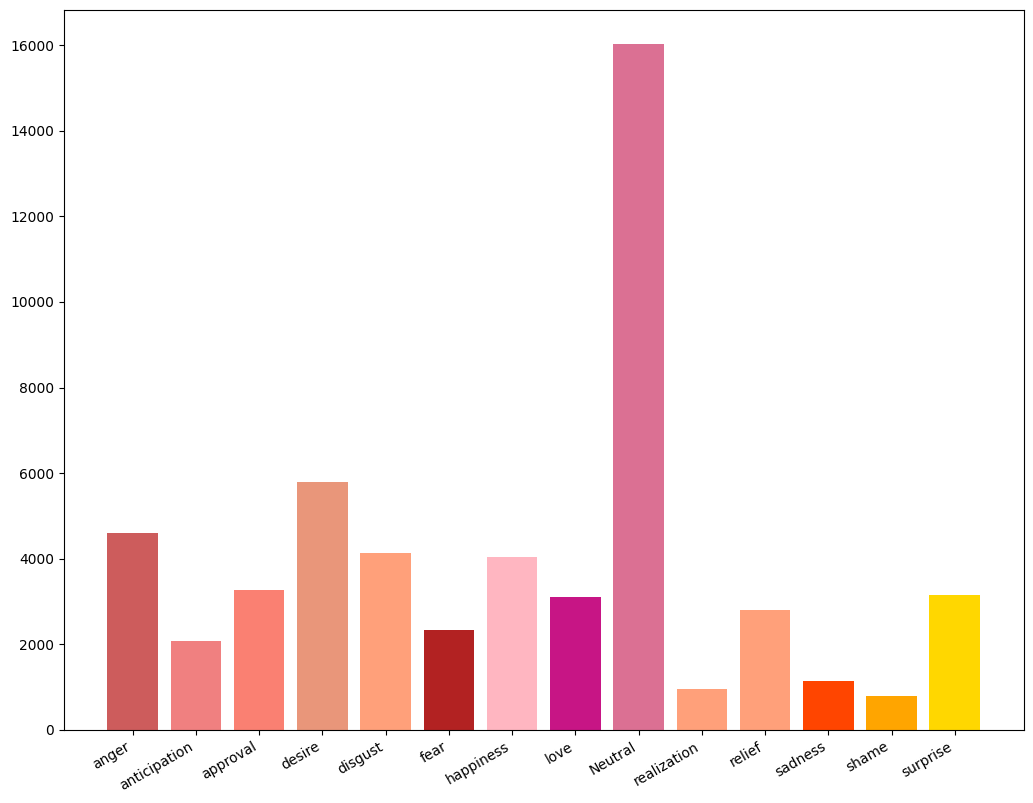

In [25]:
#Anlaysis of Texts belongs to categories/emotion class 

fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])
labels_names = [labels_dict[cname] for cname in labels_dict]
label_sum = go_emotion_simplified_train.loc[:,[labels_dict[cname] for cname in labels_dict]].apply(lambda x:x.sum())
colors = ['#CD5C5C','#F08080','#FA8072','#E9967A','#FFA07A','#B22222','#FFB6C1','#C71585','#DB7093', \
          '#FFA07A','#FFA07A','#FF4500','#FFA500','#FFD700','#FFE4B5','#BDB76B','#DDA0DD','#FF00FF', \
          '#BA55D3','#663399','#8B008B','#4B0082','#7B68EE','#ADFF2F','#9ACD32','#556B2F','#20B2AA', \
          '#FFF933']
ax.bar(labels_names,label_sum, color = colors)
plt.xticks(rotation=30, ha='right')
plt.show()

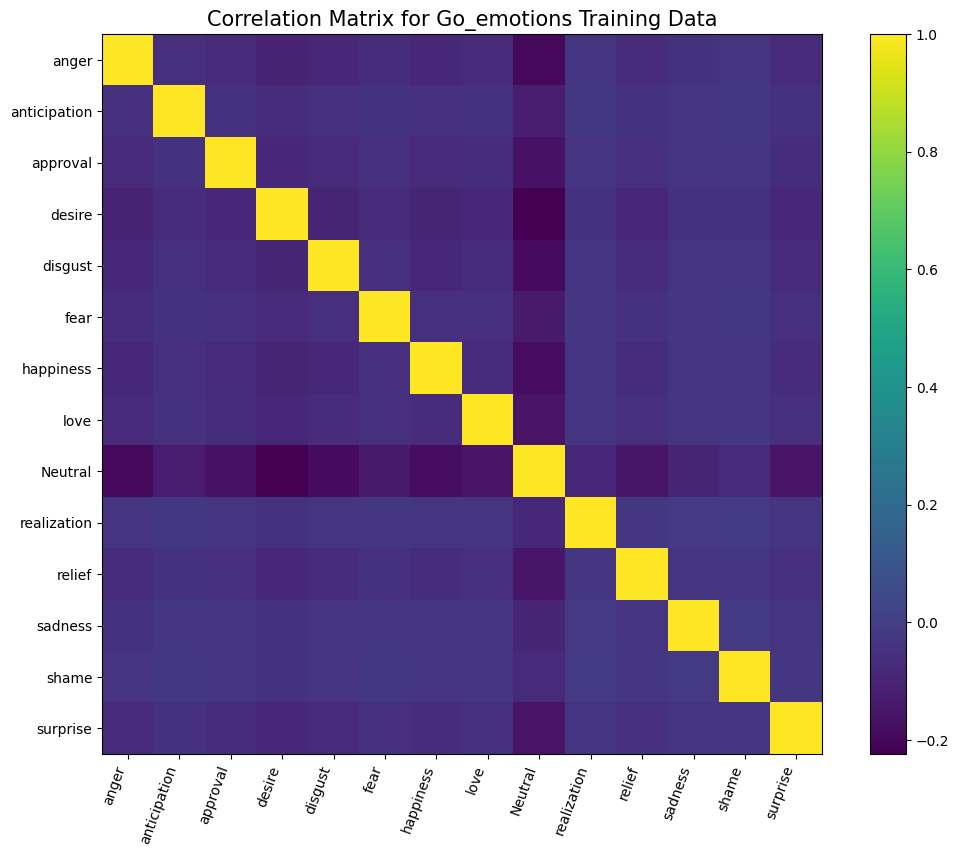

In [27]:
### correlation graph will help us to correlate between different emotion type if there is any although it is similar to one hot encode so it'll only populate how the occurence of emotions are distributed

corr_matrix = go_emotion_simplified_train.iloc[:,7:].corr()  

fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])
corrMat = ax.matshow(corr_matrix)
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=70, ha = 'right')
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.gca().xaxis.tick_bottom()
plt.colorbar(corrMat)
plt.title(f'Correlation Matrix for Go_emotions Training Data', fontsize=15)
plt.show()

correlation matrix shows that there are multiple emotions shows strong correlation in between emotions

In [28]:
## to understand better , distribution of emotions over the dataset can be checked through the TreeMap
!pip install squarify    # pip install squarify (algorithm for treemap)

ERROR: Invalid requirement: '#'


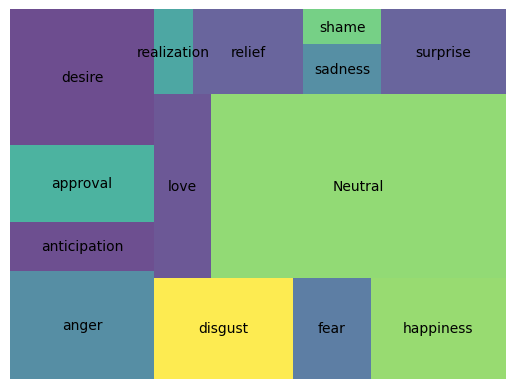

In [29]:
## refrenced from --- https://www.python-graph-gallery.com/200-basic-treemap-with-python

import squarify    

labels_names = [labels_dict[cname] for cname in labels_dict]
label_sum = go_emotion_simplified_train.loc[:,[labels_dict[cname] for cname in labels_dict]].apply(lambda x:x.sum())
df = pd.DataFrame({'nb_people':[8,3,4,2], 'group':["group A", "group B", "group C", "group D"] })

# plot it
squarify.plot(sizes=label_sum, label=labels_names, alpha=.8 )
plt.axis('off')
plt.show()

#### Let's see the vocabulary first 

In [33]:
# check the vocubalry size first
token_list_combined = []
token_list_combined = [i for l1 in go_emotion_simplified_train['text'].apply(lambda x:x.split()) for i in l1]

In [34]:
# Refrenced from lab -01
# create token list and vocab size for comparison of word distribution within dataset

vocab = sorted(set(token_list_combined))
display(vocab)


['!',
 '!!',
 '!!!',
 '!!!!',
 '!!!!!',
 '!!!!!!',
 '!!:)',
 '!"',
 '!=',
 '!?',
 '!?!',
 '!CURSED!',
 '!Messageme',
 '!RemindMe',
 '!Remindme',
 '!delta',
 '!remindme',
 '"',
 '"**my**',
 '"*I',
 '"*New',
 '"*Why',
 '"*You',
 '"*[NAME],',
 '"*sent',
 '".',
 '"......shit."',
 '"...And',
 '"...after',
 '"...but',
 '"...for',
 '"...one',
 '"1-"',
 '"1000',
 '"12',
 '"14',
 '"1v1',
 '"3D"',
 '"7"',
 '">>")',
 '"A',
 '"AAAAAH',
 '"AHHH',
 '"AaaaaAAAaaaAAAhhh!"',
 '"Ab-Fab"',
 '"Acsended',
 '"Addison\'s',
 '"Allergy:',
 '"Amish',
 '"An',
 '"And',
 '"And,',
 '"Annihilation"',
 '"Anti',
 '"Anything',
 '"Are',
 '"Assault',
 '"At',
 '"Au-Bo"',
 '"BIG',
 '"BOTTOM',
 '"BRB"',
 '"Bad',
 '"Been',
 '"Being',
 '"Best',
 '"Better',
 '"Bingo!"',
 '"Boy',
 '"Brilliant,',
 '"Brussels',
 '"BuT',
 '"Build',
 '"But',
 '"Buy',
 '"By',
 '"CTR',
 '"Cammy"',
 '"Can',
 '"Chicken',
 '"Chicken"',
 '"Claim',
 '"Classic',
 '"Come',
 '"Consent',
 '"Corporate',
 '"Correlation',
 '"Could',
 '"Cute',
 '"DARWIN',
 '"Dadd

In [35]:
token_list_combined_len = len(token_list_combined)
vocab_list_len = len(vocab)

display(f"Size of Tokens is {token_list_combined_len}")   
display(f"Size of vocabulary is {vocab_list_len}")

'Size of Tokens is 695858'

'Size of vocabulary is 65523'

In [36]:
# but we have punctuation in it, we need to remove those punctuation
# to do this we have several ways using regex or string methods or nltk methods of tokenizing

In [37]:
# token_list = [i for l1 in go_emotion_simplified_train['text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation))).apply(lambda x:x.split()) for i in l1]
token_list_combined_modified = [i for l1 in go_emotion_simplified_train['text'].apply(lambda x: re.sub(r'[^\w\s]','',x)).apply(lambda x:x.lower().split()) for i in l1]


In [38]:
vocab_modified = sorted(set(token_list_combined_modified))
display(vocab_modified)


['0',
 '00',
 '000001',
 '00000100001001001000',
 '00001',
 '0009',
 '0015',
 '0033',
 '005',
 '007',
 '008',
 '00s',
 '00searly',
 '01',
 '010',
 '011119',
 '01122',
 '018',
 '02',
 '030',
 '04',
 '048',
 '05',
 '050',
 '0510',
 '05933',
 '06',
 '069',
 '07',
 '075',
 '08',
 '0809',
 '09',
 '1',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '1000000',
 '100000s',
 '100000wanting',
 '100000x',
 '10000k',
 '10000th',
 '10001',
 '1000ft',
 '1000the',
 '1003',
 '100im',
 '100k',
 '100m',
 '100million',
 '100s',
 '100t',
 '100th',
 '100x',
 '100years',
 '101',
 '1010',
 '1012',
 '1013',
 '1014',
 '1015',
 '101miami21',
 '102',
 '1020',
 '1030',
 '1030pm',
 '105',
 '107',
 '1080',
 '1080p',
 '1080ti',
 '10907th',
 '10eth',
 '10f',
 '10iar',
 '10k',
 '10k29k',
 '10m',
 '10mcg',
 '10mg',
 '10mil',
 '10s',
 '10th',
 '10x',
 '11',
 '110',
 '1100',
 '1105',
 '110chicago21',
 '110dallas01',
 '110golden',
 '110kmh',
 '110minnesota01',
 '110th',
 '111',
 '1110',
 '1113',
 '112',
 '1122019',
 '1122p

In [39]:
token_list_modified_len = len(token_list_combined_modified)
vocab_list_modified_len = len(vocab_modified)

display(f"Size of Tokens is {token_list_modified_len}")   
display(f"Size of vocabulary is {vocab_list_modified_len}")

'Size of Tokens is 691882'

'Size of vocabulary is 31833'

#### Can Add WordCloud and do some analyis on texts

will add later

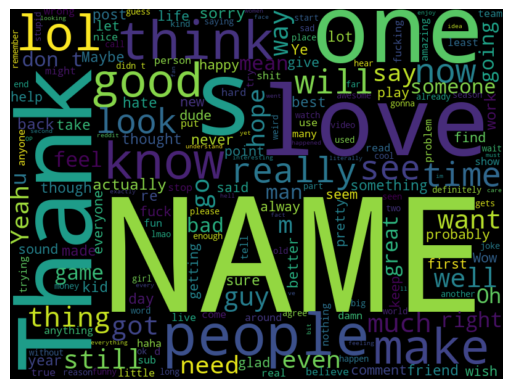

In [40]:
## code refrenced from -- https://www.python-graph-gallery.com/wordcloud/

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a list of word
sentence_list_combined = ""
sentence_list_combined = " ".join(go_emotion_simplified_train['text'].values)


# Create the wordcloud object
wordcloud = WordCloud(width=800, height=600, margin=0).generate(sentence_list_combined)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [41]:
#reference from 
# --  https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools


<Axes: >

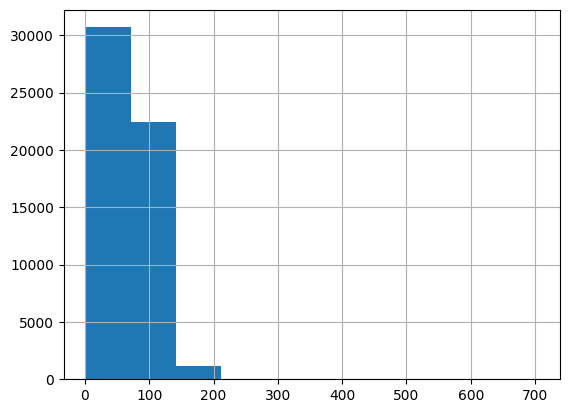

In [42]:

#Number of characters present in every sentence

go_emotion_simplified_train['text'].str.len().hist()


Above graph represents most of our sentences range in 1 to 220 characters length

<Axes: >

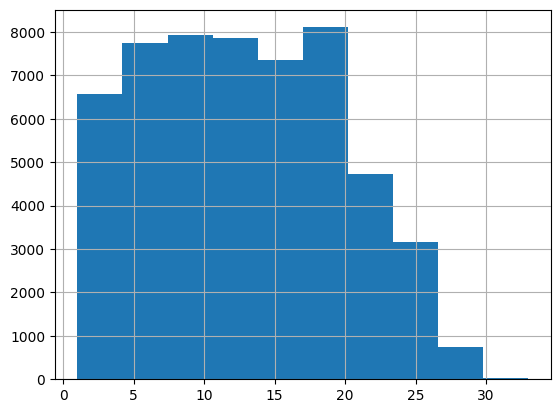

In [43]:
## Now we can change it to word level exploration

go_emotion_simplified_train['text'].str.split().map(lambda x: len(x)).hist()

Sentence contains words in range of 1 to 35, mostly falls between 4 to 20

<Axes: >

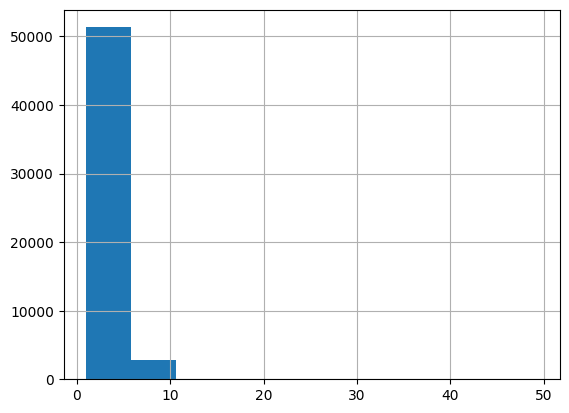

In [44]:
## To check average word length

go_emotion_simplified_train['text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

from the above graph it concludes that word length averages to 1 to 50, but average length turns out to 1 to 5, does that mean it corresponds to use of mostly stop words.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\deepe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


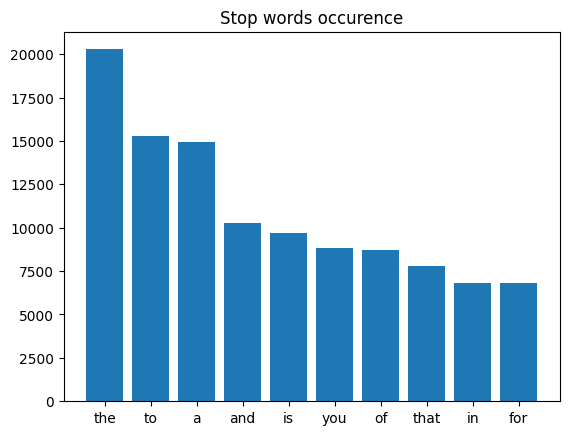

In [45]:
# now let's remove the stop words and then check again

import nltk
nltk.download('stopwords')
stop_words=set(nltk.corpus.stopwords.words('english'))

corpus=[]
new= go_emotion_simplified_train['text'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop_words:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)
plt.title('Stop words occurence')
plt.show()

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word not in stop_words:
        dic[word]+=1


Above graphs shows that stop words are occuring too frequently and words like "the" "to" and "a" dominates the sentences in go emotions dataset.


<Axes: >

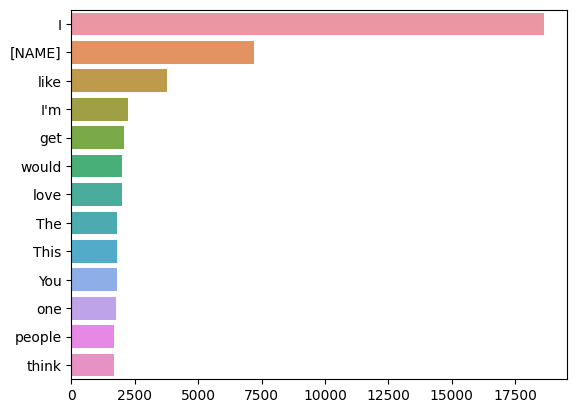

In [46]:
from collections import Counter
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:50]:
    if (word not in stop_words):
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x)

I, [NAME], like are the most dominant keywords

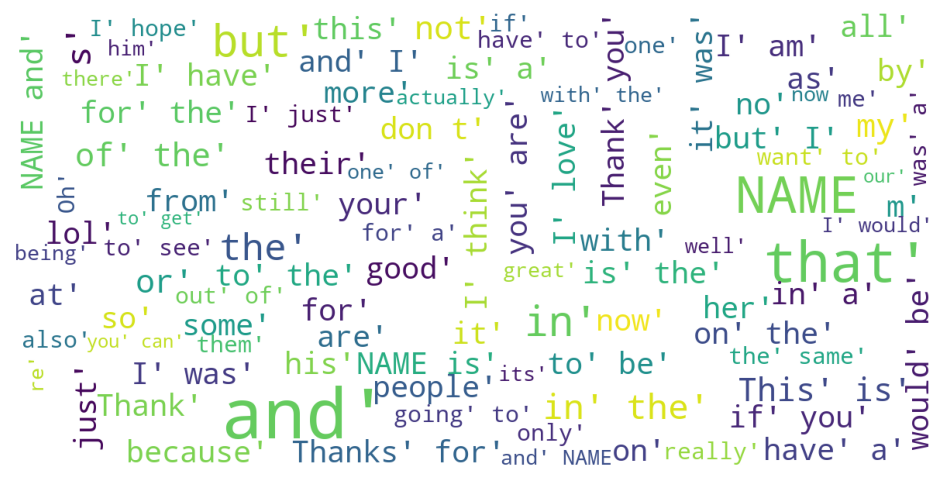

In [47]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)

<span style="color:red">-- Put Observation here of above</span>

### Task -2
#### - 1 - Data preprocessing
##### - 1.1 - Tokenization 

Tokenization can be done in different ways
- Character tokenization
- word tokenization
- SubWord Tokenization
- sentence tokenization

Here we already having sentences in our data, so no need to do sentence tokenization
- we can look towards words tokenization and Subword Tokenization(refers to n-gram)
- we will be experimenting with different tokenizer



In [48]:
## Main dataset loaded as     >>       go_emotion_simplified_train

#There are different ways to perform tokenization

## - using pandas and basic split python functions, here we are also doing lowering of text as well as removing special characters from it

go_emotion_simplified_train['tokens_p'] = go_emotion_simplified_train['text'].apply(lambda x: re.sub(r'[^\w\s]','',x)).apply(lambda x:x.lower().split())


In [49]:
display(go_emotion_simplified_train['tokens_p'].head())

0    [my, favourite, food, is, anything, i, didnt, ...
1    [now, if, he, does, off, himself, everyone, wi...
2                [why, the, fuck, is, bayless, isoing]
3                    [to, make, her, feel, threatened]
4                           [dirty, southern, wankers]
Name: tokens_p, dtype: object

In [50]:
## We can explore different ways to do the tokenization
## Tokenization can be done by NLTK package
## there are modules like RegexpTokenizer, TreeBankWordTokenizer
from nltk.tokenize import RegexpTokenizer, TreebankWordTokenizer


tokenizer_regex = RegexpTokenizer(r"\w+|$[0-9.]+|\S+")   #initializeing regex tokenizer
go_emotion_simplified_train['tokens_regx'] = go_emotion_simplified_train['text'].apply(lambda x: tokenizer_regex.tokenize(x.lower()))


tokenizer_tbank = TreebankWordTokenizer()   #initializeing TreeBank tokenizer
go_emotion_simplified_train['tokens_tbank'] = go_emotion_simplified_train['text'].apply(lambda x: tokenizer_tbank.tokenize(x.lower()))



In [51]:
display(go_emotion_simplified_train['tokens_regx'].head())

0    [my, favourite, food, is, anything, i, didn, '...
1    [now, if, he, does, off, himself, ,, everyone,...
2                [why, the, fuck, is, bayless, isoing]
3                    [to, make, her, feel, threatened]
4                           [dirty, southern, wankers]
Name: tokens_regx, dtype: object

In [52]:
display(go_emotion_simplified_train['tokens_tbank'].head())

0    [my, favourite, food, is, anything, i, did, n'...
1    [now, if, he, does, off, himself, ,, everyone,...
2                [why, the, fuck, is, bayless, isoing]
3                    [to, make, her, feel, threatened]
4                           [dirty, southern, wankers]
Name: tokens_tbank, dtype: object

In [53]:
# we will be exploring subword tokenization and observe how they are different from normal tokenization
# we will be performing 2-gram and 3-gram
# to performa n-gram we'll be using token_tbank generated from treebanktokenizer

from nltk.util import ngrams

def join_list(ngram_list):
    return [" ".join(i) for i in ngram_list]

go_emotion_simplified_train['tokens_tbank_2_grams'] = go_emotion_simplified_train['tokens_tbank'].apply(lambda x: join_list(list(ngrams(x, 2))))  # 2-grams
go_emotion_simplified_train['tokens_tbank_3_grams'] = go_emotion_simplified_train['tokens_tbank'].apply(lambda x: join_list(list(ngrams(x, 3))))  # 3-grams


In [54]:
display("Bigrams:",go_emotion_simplified_train['tokens_tbank_2_grams'].head())

'Bigrams:'

0    [my favourite, favourite food, food is, is any...
1    [now if, if he, he does, does off, off himself...
2    [why the, the fuck, fuck is, is bayless, bayle...
3       [to make, make her, her feel, feel threatened]
4                   [dirty southern, southern wankers]
Name: tokens_tbank_2_grams, dtype: object

In [55]:
display("Trigrams:",go_emotion_simplified_train['tokens_tbank_3_grams'].head())

'Trigrams:'

0    [my favourite food, favourite food is, food is...
1    [now if he, if he does, he does off, does off ...
2    [why the fuck, the fuck is, fuck is bayless, i...
3    [to make her, make her feel, her feel threatened]
4                             [dirty southern wankers]
Name: tokens_tbank_3_grams, dtype: object

<span style="color:red">-- Put Observation here of above</span>

##### - 1.2 - Stop word Removal 

- 1.2 - 

- We can use different language of stop words available at nltk package or other packages like sklearn
- we will be observing different stop words set
- we can also define our own stop words list

In [56]:
# first we need to download stop words from nltk, package we will be using english language stop words 
import nltk       # code taken from lab-01
nltk.download('stopwords')

stop_words = nltk.corpus.stopwords.words('english')
print(f"number of stopwords: {len(stop_words)}")
print(stop_words)

number of stopwords: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own'

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\deepe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [57]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as sklearn_stop_words    # code taken from lab-01

print(f"number of stopwords: {len(sklearn_stop_words)}")
print(sklearn_stop_words)

number of stopwords: 318
frozenset({'his', 'under', 'thereafter', 'above', 'enough', 'those', 'were', 'thin', 'another', 'much', 'which', 'them', 'meanwhile', 'next', 'etc', 'own', 'everyone', 'hundred', 'before', 'myself', 'and', 'go', 'sixty', 'an', 'from', 'two', 'throughout', 'again', 'only', 'him', 'if', 'hers', 'latter', 'least', 'up', 're', 'thick', 'former', 'whoever', 'neither', 'now', 'whither', 'thru', 'six', 'together', 'noone', 'whereafter', 'already', 'across', 'due', 'detail', 'three', 'many', 'found', 'somewhere', 'might', 'is', 'without', 'also', 'done', 'every', 'hasnt', 'still', 'upon', 'otherwise', 'was', 'itself', 'mine', 'any', 'find', 'forty', 'we', 'its', 'although', 'whole', 'de', 'whose', 'it', 'everywhere', 'since', 'hence', 'no', 'wherein', 'part', 'been', 'for', 'can', 'formerly', 'however', 'top', 'same', 'except', 'have', 'perhaps', 'all', 'name', 'each', 'alone', 'over', 'take', 'often', 'because', 'why', 'nine', 'front', 'inc', 'mostly', 'wherever', 'ot

In [58]:
## we can combine different stopwords derived from different packages and also add more in it
n_stop_words = stop_words+list(sklearn_stop_words)
n_stop_words = [n.lower() for n in n_stop_words]     # token_list is alrerady converted in lower case, we should also keep stopwords in lower case

In [59]:
def remove_stop_word(token_list, stop_word):
    n_token_list = []
    for _ in token_list:
        if _ not in stop_words and len(_)>=1:
            n_token_list.append(_)
    return n_token_list

go_emotion_simplified_train['tokens_tbank_removed_stopwords'] = go_emotion_simplified_train['tokens_tbank'].apply(lambda x : remove_stop_word(x,n_stop_words))

In [60]:
display(go_emotion_simplified_train['tokens_tbank_removed_stopwords'].head())

0            [favourite, food, anything, n't, cook, .]
1    [,, everyone, think, hes, laugh, screwing, peo...
2                              [fuck, bayless, isoing]
3                             [make, feel, threatened]
4                           [dirty, southern, wankers]
Name: tokens_tbank_removed_stopwords, dtype: object

<span style="color:red">-- Put Observation here of above</span>

##### - 1.3 - Stemming 

In [61]:
# for stemming there are different types of stemmer available within NLTK package we'll be using porterStemmer and SnowBallStemmer
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer

def stemmer_process(stemmer, token_list):
    return [stemmer.stem(i) for i in token_list]

p_stemmer = PorterStemmer()
sb_stemmer = SnowballStemmer(language='english')

go_emotion_simplified_train['tokens_tbank_p_stem'] = go_emotion_simplified_train['tokens_tbank'].apply(lambda x : stemmer_process(p_stemmer,x))
go_emotion_simplified_train['tokens_tbank_sb_stem'] = go_emotion_simplified_train['tokens_tbank'].apply(lambda x : stemmer_process(sb_stemmer,x))


In [62]:
display(go_emotion_simplified_train['tokens_tbank_p_stem'].head())

0    [my, favourit, food, is, anyth, i, did, n't, h...
1    [now, if, he, doe, off, himself, ,, everyon, w...
2                   [whi, the, fuck, is, bayless, iso]
3                      [to, make, her, feel, threaten]
4                            [dirti, southern, wanker]
Name: tokens_tbank_p_stem, dtype: object

In [63]:
display(go_emotion_simplified_train['tokens_tbank_sb_stem'].head())

0    [my, favourit, food, is, anyth, i, did, n't, h...
1    [now, if, he, doe, off, himself, ,, everyon, w...
2                   [whi, the, fuck, is, bayless, iso]
3                      [to, make, her, feel, threaten]
4                            [dirti, southern, wanker]
Name: tokens_tbank_sb_stem, dtype: object

<span style="color:red">-- Put Observation here of above</span>

##### - 1.4 - Lemmatization and POS tagging

In [64]:
# NLTK also provides lemmetizer 
# other than nltk there are several package which provides lemmatizer method 
# like Spacy,Genism,PyTorch,TensorFlow,Keras,Pattern,TextBlob,PolyGot,Vocabulary,PyNLPI 

###  We will be using wordnetlemmatizer 

from nltk.stem import WordNetLemmatizer

nltk.download("wordnet")
nltk.download("omw-1.4")

def lemmatizer_process(lemmatizer, token_list, pos=None):
    return [lemmatizer.lemmatize(i) for i in token_list]

lemmatizer = WordNetLemmatizer()

go_emotion_simplified_train['tokens_tbank_lemmatized'] = go_emotion_simplified_train['tokens_tbank'].apply(lambda x : lemmatizer_process(lemmatizer,x))

display(go_emotion_simplified_train['tokens_tbank_lemmatized'].head())


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\deepe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\deepe\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


0    [my, favourite, food, is, anything, i, did, n'...
1    [now, if, he, doe, off, himself, ,, everyone, ...
2                [why, the, fuck, is, bayless, isoing]
3                    [to, make, her, feel, threatened]
4                            [dirty, southern, wanker]
Name: tokens_tbank_lemmatized, dtype: object

In [65]:
# Lemmatizing can be improved by POS tagging

print(lemmatizer.lemmatize("better"))
print(lemmatizer.lemmatize("better", "a"))  # declaring the POS as adjective

better
good


<span style="color:red">-- Put Observation here of above </span>

<span style="color:red">-- and explain use of lemmatize example</span>


In [66]:
from nltk.corpus import wordnet

## function refernced -- lab -01

def get_wordnet_pos(word):
    """Map the POS tag to the first character lemmatize() accepts."""
    try:  # download nltk's POS tagger if it doesn't exist
        nltk.data.find("taggers/averaged_perceptron_tagger")
    except LookupError:
        nltk.download("averaged_perceptron_tagger")
    tag = nltk.pos_tag([word])[0][1][0].upper()  # use ntlk's POS tagger on the word

    # now we need to convert from nltk to wordnet POS notations (for compatibility reasons)
    tag_dict = {
        "J": wordnet.ADJ,
        "N": wordnet.NOUN,
        "V": wordnet.VERB,
        "R": wordnet.ADV
    }

    return tag_dict.get(tag, wordnet.NOUN)  # return and default to noun if not found

In [67]:

def lemmatizer_process(lemmatizer, token_list, pos=None):
    if pos is not None:
        return [lemmatizer.lemmatize(i, pos(i)) for i in token_list]
    else:
        return [lemmatizer.lemmatize(i) for i in token_list]

# stem_tokens = [lemmatizer.lemmatize(x, pos=get_wordnet_pos(x)) for x in norm_tokens]
# print(stem_tokens)

go_emotion_simplified_train['tokens_tbank_lemmatized_pos'] = go_emotion_simplified_train['tokens_tbank'].apply(lambda x : lemmatizer_process(lemmatizer,x, get_wordnet_pos))

display(go_emotion_simplified_train['tokens_tbank_lemmatized_pos'].head())

0    [my, favourite, food, be, anything, i, do, n't...
1    [now, if, he, do, off, himself, ,, everyone, w...
2                [why, the, fuck, be, bayless, isoing]
3                      [to, make, her, feel, threaten]
4                            [dirty, southern, wanker]
Name: tokens_tbank_lemmatized_pos, dtype: object

to create word cloud  https://towardsdatascience.com/getting-started-with-text-analysis-in-python-ca13590eb4f7

reference - https://medium.com/analytics-vidhya/tokenization-building-a-tokenizer-and-a-sentencizer-c19a00393c19
-- https://reference.wolfram.com/language/guide/TextNormalization.html
-- https://towardsdatascience.com/how-to-turn-text-into-features-478b57632e99

### <span style="color:red">we can add remaining part to anlaysis and visualtion part-- Put Observation here of above</span>

<span style="color:red">-- Put Observation here of above</span>

#### - 2 - Text Featurization / Transformation
##### - There are different types of text featurization
- 1 - One-hot encoding - this is done based on the word dictionary
- 2 - Frequency Distribution of words within document
- 3 - TF - IDF feature vector
- 4 - Word Embedding - # we will be using this for deep learning models

-- Frequency distribution is useful where document length is bigger.

-- Here we will be performing TF - IDF using NLTK package and will observe how it can be useful

In [68]:
## Reference - Lab -02

def calculate_tf(token_count, bow):
    # print(bow)
    tf = {} #creates an empty dictionary where key,value pair is stored
    num_bow = len(bow)
    if num_bow == 0:
        return tf
    else:
        for token, count in token_count.items():
            # TODO - Calculate the term frequency using the formula:
            # "count of term in the document" / "total number of words in the document"
            tf[token] = count/num_bow
        # print(tf)
        return tf

- We are only considering 200 examples of data for now

In [69]:
token_ls_200 = [i for l1 in go_emotion_simplified_train['text'][:200].apply(lambda x: re.sub(r'[^\w\s]','',x)).apply(lambda x:x.lower().split()) for i in l1]


In [70]:
token_new_200 = go_emotion_simplified_train['text'][:200].apply(lambda x: re.sub(r'[^\w\s]','',x)).apply(lambda x:x.lower().split())


In [71]:
set(token_ls_200)

{'1',
 '10',
 '1000',
 '10k',
 '12',
 '14',
 '18',
 '2',
 '2015',
 '2019',
 '3',
 '34',
 '35',
 '5',
 '70',
 '8',
 '90',
 '9k',
 'a',
 'able',
 'about',
 'absolutely',
 'abt',
 'accepted',
 'access',
 'accidentally',
 'actual',
 'actually',
 'acura',
 'ad',
 'admin',
 'adore',
 'after',
 'again',
 'against',
 'aint',
 'alcohol',
 'alerted',
 'alive',
 'all',
 'allow',
 'almost',
 'already',
 'also',
 'always',
 'am',
 'amazing',
 'an',
 'and',
 'animal',
 'another',
 'anxiety',
 'anxiously',
 'any',
 'anybody',
 'anymore',
 'anyone',
 'anything',
 'apologies',
 'appalachia',
 'apparently',
 'applies',
 'appreciate',
 'ar',
 'are',
 'around',
 'as',
 'as4',
 'aside',
 'aspergers',
 'asst',
 'at',
 'atmosphere',
 'aunt',
 'australia',
 'authorities',
 'autonomy',
 'average',
 'aw',
 'awake',
 'away',
 'awesome',
 'aww',
 'back',
 'background',
 'baffles',
 'bald',
 'bandaging',
 'banned',
 'bare',
 'bayless',
 'be',
 'because',
 'been',
 'before',
 'being',
 'believe',
 'bench',
 'best',

In [72]:
## to calculate TF-IDF first needed to calculate TF

# we can use vocab created above while analysis

# vocab_modified

def _get_tf(tokens, vocab):
    token_count = dict.fromkeys(vocab, 0)
    for token in tokens:
        token_count[token] += 1
    return calculate_tf(token_count, tokens)



tf_list = token_new_200.apply(lambda x : _get_tf(x, set(token_ls_200)))

# tf_01 = _get_tf(tokens_01, vocab_modified)

In [73]:
for i in tf_list.items():
    print(i[1])

{'his': 0.0, 'noticed': 0.0, 'wonder': 0.0, 'causes': 0.0, 'anybody': 0.0, 'adore': 0.0, 'subs': 0.0, 'mean': 0.0, 'outrage': 0.0, 'unless': 0.0, 'past': 0.0, 'tip': 0.0, 'stressed': 0.0, 'hands': 0.0, 'sensitive': 0.0, 'fool': 0.0, 'ready': 0.0, 'filthy': 0.0, 'protection': 0.0, 'under': 0.0, 'laughable': 0.0, 'woman': 0.0, 'dad': 0.0, 'enough': 0.0, 'family': 0.0, 'help': 0.0, 'those': 0.0, 'crazy': 0.0, 'were': 0.0, 'demographics': 0.0, 'handsome': 0.0, 'cook': 0.09090909090909091, 'fbi': 0.0, 'another': 0.0, 'broken': 0.0, 'lmao': 0.0, 'much': 0.0, 'them': 0.0, 'awake': 0.0, 'sack': 0.0, 'next': 0.0, 'sacrifice': 0.0, '10k': 0.0, 'muggings': 0.0, 'sounds': 0.0, 'peng': 0.0, 'everyone': 0.0, 'plan': 0.0, 'significant': 0.0, 'anxiously': 0.0, 'before': 0.0, 'boat': 0.0, 'myself': 0.09090909090909091, 'and': 0.0, '5': 0.0, 'decent': 0.0, 'happy': 0.0, 'go': 0.0, 'debating': 0.0, 'didnt': 0.09090909090909091, 'an': 0.0, 'from': 0.0, 'two': 0.0, 'again': 0.0, 'pal': 0.0, 'only': 0.0, 'h

In [74]:
## calculating IDF

import math

def calculate_idf(docs):
    N = len(docs)
    
    # TODO 1 - Initialise a new dictionary with the keys from the documents and the values set to 0
    idf = dict.fromkeys(docs[0].keys(), 0)
    for doc in docs:
        for word, val in doc.items():
            if val > 0:
                # TODO 2 - Increase the idf dictionary counter by one
                idf[word] += 1
    
    for word, val in idf.items():
        idf[word] = math.log(N / float(val))

    return idf

In [75]:
idf_list = calculate_idf(tf_list)

In [76]:
#The TF-IDF score of a term in a document is calculated as the 
#product of its term frequency (TF) and inverse document frequency (IDF).
def calculate_tfidf(tfs, idfs):
    tfidf = {}

    for word, val in tfs.items():
        # TODO - Calculate and store the tfidf
        tfidf[word] = val * idfs[word]

    return tfidf

In [77]:
tf_idf_list = tf_list.apply(lambda x : calculate_tfidf(x, idf_list))

display(tf_idf_list.head())

0    {'his': 0.0, 'noticed': 0.0, 'wonder': 0.0, 'c...
1    {'his': 0.0, 'noticed': 0.0, 'wonder': 0.0, 'c...
2    {'his': 0.0, 'noticed': 0.0, 'wonder': 0.0, 'c...
3    {'his': 0.0, 'noticed': 0.0, 'wonder': 0.0, 'c...
4    {'his': 0.0, 'noticed': 0.0, 'wonder': 0.0, 'c...
Name: text, dtype: object

In [99]:
tf_idf_list[0]

{'his': 0.0,
 'noticed': 0.0,
 'wonder': 0.0,
 'causes': 0.0,
 'anybody': 0.0,
 'adore': 0.0,
 'subs': 0.0,
 'mean': 0.0,
 'outrage': 0.0,
 'unless': 0.0,
 'past': 0.0,
 'tip': 0.0,
 'stressed': 0.0,
 'hands': 0.0,
 'sensitive': 0.0,
 'fool': 0.0,
 'ready': 0.0,
 'filthy': 0.0,
 'protection': 0.0,
 'under': 0.0,
 'laughable': 0.0,
 'woman': 0.0,
 'dad': 0.0,
 'enough': 0.0,
 'family': 0.0,
 'help': 0.0,
 'those': 0.0,
 'crazy': 0.0,
 'were': 0.0,
 'demographics': 0.0,
 'handsome': 0.0,
 'cook': 0.4816652151407306,
 'fbi': 0.0,
 'another': 0.0,
 'broken': 0.0,
 'lmao': 0.0,
 'much': 0.0,
 'them': 0.0,
 'awake': 0.0,
 'sack': 0.0,
 'next': 0.0,
 'sacrifice': 0.0,
 '10k': 0.0,
 'muggings': 0.0,
 'sounds': 0.0,
 'peng': 0.0,
 'everyone': 0.0,
 'plan': 0.0,
 'significant': 0.0,
 'anxiously': 0.0,
 'before': 0.0,
 'boat': 0.0,
 'myself': 0.4816652151407306,
 'and': 0.0,
 '5': 0.0,
 'decent': 0.0,
 'happy': 0.0,
 'go': 0.0,
 'debating': 0.0,
 'didnt': 0.4816652151407306,
 'an': 0.0,
 'from': 

<span style="color:red">-- Put Observation here of above</span>

##### Let's perform Word Embeddings

- there are several packages which offers word embedding methods.
- Like gensim, glove etc.
- we will be exploring gensim, glove's word2vec embedding methods

In [78]:
from nltk.tokenize import word_tokenize

#just for experimenting purposes we'll continue without doing preprocessing
go_emotion_simplified_train['tokenized_word'] = go_emotion_simplified_train['text'].apply(lambda x: word_tokenize(x.lower()))



In [79]:
display(go_emotion_simplified_train['tokenized_word'].head())

0    [my, favourite, food, is, anything, i, did, n'...
1    [now, if, he, does, off, himself, ,, everyone,...
2                [why, the, fuck, is, bayless, isoing]
3                    [to, make, her, feel, threatened]
4                           [dirty, southern, wankers]
Name: tokenized_word, dtype: object

In [80]:
## Code reference from lab -04

from gensim.models.word2vec import Word2Vec

# Number of vector elements (dimensions) to represent the word vector
num_features = 300
# Min number of word count to be considered in the Word2vec model. If your corpus is small, reduce the min count. If you’re training with a large corpus, increase the min count.
min_word_count = 1
# Number of CPU cores used for the training. If you want to set the number of cores dynamically, check out import multiprocessing: 
#num_workers = multiprocessing.cpu_count()
num_workers = 2
# Context window size
window_size = 3
# Subsampling rate for frequent terms
subsampling = 1e-3

In [81]:
%%time
## TODO: Use the parameters defined in the code cell above above to start Word2Vec model training.
model = Word2Vec(go_emotion_simplified_train['tokenized_word'], workers=num_workers, vector_size=num_features, min_count=min_word_count, window=window_size, sample=subsampling)


Wall time: 4.06 s


In [82]:
model_name = "my_own_domain_specific_word2vec_model"
model.save(model_name)
# Now lets say we want to load the model that we had previously saved.
from gensim.models.word2vec import Word2Vec
model_name = "my_own_domain_specific_word2vec_model"
## TODO: Load the model you just saved in your lab folder
model = Word2Vec.load(model_name)
# Let's check the most similar words to "justice"
print(model.wv.most_similar('justice'))

[('pot', 0.972296953201294), ('west', 0.9702764749526978), ('mountain', 0.968402087688446), ('plastic', 0.9680641889572144), ('double', 0.9668381214141846), ('healing', 0.9665525555610657), ('effect', 0.9656612873077393), ('target', 0.9646797180175781), ('security', 0.9646314978599548), ('sales', 0.9640807509422302)]


c:\Users\deepe\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\deepe\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


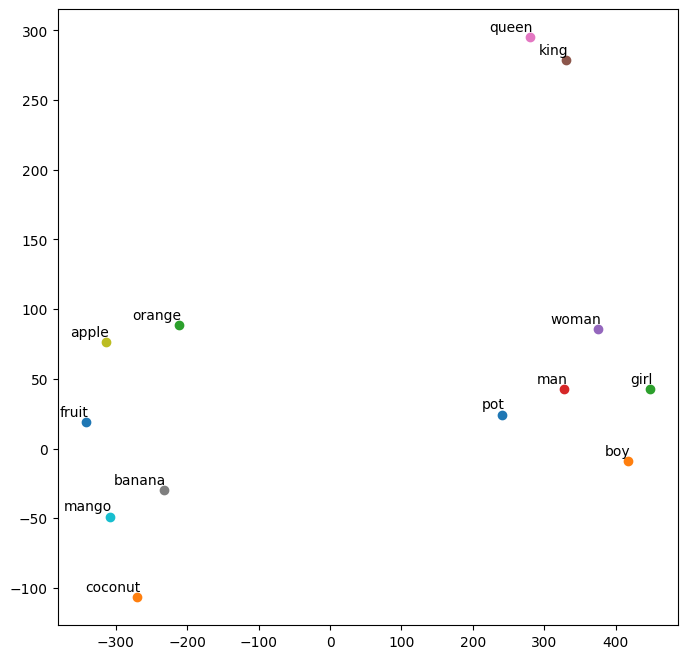

In [83]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
# We will be using the downloader for the embedding models
import gensim.downloader as api

# this command can be used to check what models are available
#api.info()
# Let's load the word2vec model from google news containing 300 features
# This will also take a minute or so
## TODO: Use the api above to load a new model 'word2vec-google-news-300'
word2vec_model = api.load('word2vec-google-news-300')
# Now check the embedding vector for "beautiful"... you will see a 300 dimensional vector
word2vec_model["beautiful"]
# Let's check some similar words to the word "girl"
word2vec_model.most_similar("girl")
# How about some maths with vectors! Try the following:

# queen - girl + boy = king
word2vec_model.most_similar(positive=['boy', 'queen'], negative=['girl'], topn=1)
# Time to do some visualisations and see how similar words end up close together and far from other words that are not as similar
vocab = ["pot","boy", "girl", "man", "woman", "king", "queen", "banana", "apple", "mango", "fruit", "coconut", "orange"]

def tsne_plot(model):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=3, n_components=2, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(np.array(wordvecs))

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(8,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

tsne_plot(word2vec_model)

c:\Users\deepe\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\deepe\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


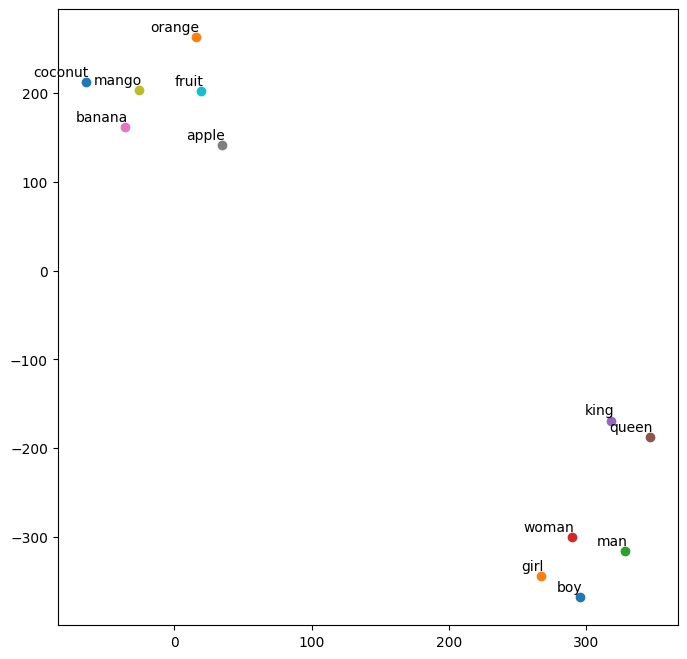

0.1759456992149353
0.2772707939147949
0.17271089553833008


In [84]:
## GloVe
# Let's try another model (GloVe) and see if that is any different to word2vec
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import gensim.downloader as api
glove_model = api.load('glove-wiki-gigaword-300')
glove_model["beautiful"]
# It will be interesting to see if this will fins similar words to "girl" like word2vec did
glove_model.most_similar("girl")
# Let's also see if it can solve the same analogy too
glove_model.most_similar(positive=['boy', 'queen'], negative=['girl'], topn=1)
vocab = ["boy", "girl", "man", "woman", "king", "queen", "banana", "apple", "mango", "fruit", "coconut", "orange"]

def tsne_plot(model):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=3, n_components=2, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(np.array(wordvecs))

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(8,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

tsne_plot(glove_model)
# Let's continue with GloVe and check if plural words play any role in how close is to the original singular words
print(glove_model.distance("fruit", "fruits"))
print(glove_model.distance("girl", "girls"))
print(glove_model.distance("girl", "boy"))

<span style="color:red">-- Put Observation here of above</span>

#### - 3 - Train Test Validation 
- Splitting dataset
##### - Dataset split process can be achieved differently like
- through sampling
- random shuffling
- split dataset from a range to particular range


-- Here we have already Train, validation, test set available.
-- We will not be updating the available test set, but discuss effect of it if any changes made further

-- Discuss above things

<span style="color:red">-- Put Observation here of above</span>

##### include SVM algorithm

---- Very simple for you just add it

#### - 4 - NLP Algorithms
- Use and observe different Models
##### - Use different Machine Learning and Deep learning models, build pipeline for the model
- create dataset and dataloader
- set hyperparameters
- set loss function optimizers
- run the model


## Basic RNN Model

-- Results are not promising

In [85]:
# reference code lab -06

import torch
import torchtext

SEED = 1234
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

print("PyTorch Version: ", torch.__version__)
print("torchtext Version: ", torchtext.__version__)
print(f"Using {'GPU' if str(DEVICE) == 'cuda' else 'CPU'}.")

PyTorch Version:  1.11.0+cpu
torchtext Version:  0.12.0
Using CPU.


In [86]:
## We'll be using one-hot encoded first to observe the data, but since it's a lot of data and as we previously checked vocavulary size is 56729
## that means we will be having 56729 dimenstions of data.

## we need to use another approach for it, for start we'll be using tokenized set of data
## and use that in a manor either top words that are populating or set a condition lesser times than that word if appears, not to be considered.

## we will be using special `<pad>` and `<unk>` characters in the text vocabulary

from torchtext.data.utils import get_tokenizer

class SpacyTokenizer(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.tokenizer = get_tokenizer("spacy", language="en_core_web_sm")
    
    def forward(self, input):
        if isinstance(input, list):
            tokens = []
            for text in input:
                tokens.append(self.tokenizer(text))
            return tokens
        elif isinstance(input, str):
            return self.tokenizer(input)
        raise ValueError(f"Type {type(input)} is not supported.")


In [87]:
from torchtext.vocab import build_vocab_from_iterator, vocab
from torchtext.data.utils import get_tokenizer
from collections import OrderedDict

tokenizer = SpacyTokenizer()
MAX_VOCAB_SIZE = 25_000

def _process_texts_for_vocab(data):
    for line in data:
        yield tokenizer(line[1])
        
def _get_labels_for_vocab(data):
    for line in data:
        yield [line[0]]

# This might take a while as we're tokenizing

## we're using our training data from go_emotions here

text_vocab = build_vocab_from_iterator(_process_texts_for_vocab(go_emotion_simplified_train[['labels_name_class','text']].values), specials=('<unk>', '<pad>'), max_tokens=MAX_VOCAB_SIZE, special_first=True)
label_vocab = vocab(OrderedDict([(i[1],i[0]+1) for i in labels_dict.items()]))

text_vocab.set_default_index(text_vocab["<unk>"])

In [88]:
label_vocab.get_stoi()

{'relief': 10,
 'disgust': 4,
 'anticipation': 1,
 'anger': 0,
 'happiness': 6,
 'approval': 2,
 'desire': 3,
 'fear': 5,
 'love': 7,
 'sadness': 11,
 'Neutral': 8,
 'realization': 9,
 'shame': 12,
 'surprise': 13}

In [89]:
print(f"Unique tokens in text vocabulary: {len(text_vocab)}")
print(f"Unique tokens in label vocabulary: {len(label_vocab)}")

Unique tokens in text vocabulary: 25000
Unique tokens in label vocabulary: 14


In [90]:
text_vocab.get_stoi()

{'Alicorn': 18914,
 'underrated': 3688,
 'bio': 4552,
 'edit': 1456,
 'aswell': 4543,
 'Seek': 8697,
 'Sort': 7453,
 'affects': 5926,
 'sources': 2625,
 'limewire': 16151,
 'love': 59,
 'thinkers': 12366,
 'inherently': 5518,
 'happy': 219,
 'checking': 3239,
 'rats': 5138,
 'thread': 575,
 'charge': 2396,
 'Mafia': 23078,
 'Cosplayer': 20266,
 'treating': 5205,
 'STILL': 4515,
 'adoption': 10757,
 'Despacito': 20652,
 "'m": 52,
 'LOVE': 1554,
 'Artificial': 12781,
 'unlike': 3903,
 'point': 231,
 'fruit': 2878,
 'Nightengale': 23586,
 'Some': 641,
 'shoulda': 12189,
 'blog': 5383,
 'confidence': 1800,
 'ideology': 3270,
 'dominant': 5443,
 'thunder': 12369,
 'restore': 16934,
 '.': 2,
 'advice': 596,
 'lvl': 9373,
 'Cakeday': 2546,
 'newspapers': 7970,
 '<unk>': 0,
 'Provided': 13869,
 'pairs': 8016,
 'NODDING': 23466,
 'Multikill': 23394,
 'if': 57,
 'snuggle': 9710,
 'spurs': 17276,
 'joke': 386,
 'Sony': 8712,
 'Rachel': 24582,
 'tad': 5706,
 'smoke': 2228,
 '<pad>': 1,
 'Progress'

In [91]:
display(text_vocab.get_itos()[:10])

['<unk>', '<pad>', '.', 'I', 'the', ',', 'to', 'a', 'you', '!']

In [92]:
display(label_vocab.get_itos())

['anger',
 'anticipation',
 'approval',
 'desire',
 'disgust',
 'fear',
 'happiness',
 'love',
 'Neutral',
 'realization',
 'relief',
 'sadness',
 'shame',
 'surprise']

In [93]:
from collections import Counter

counter = Counter()
for line in go_emotion_simplified_train['text']:
    counter.update(tokenizer(line))
    
counter.most_common(20)

[('.', 46300),
 ('I', 24545),
 ('the', 20353),
 (',', 17746),
 ('to', 15447),
 ('a', 14960),
 ('you', 11739),
 ('!', 11063),
 ('is', 10562),
 ('it', 10521),
 ('and', 10404),
 ('that', 9864),
 (']', 9764),
 ('[', 9745),
 ('NAME', 9570),
 ('of', 8774),
 ('in', 7004),
 ('for', 6939),
 ('?', 6683),
 ('this', 6250)]

-- now we need to create pipeline for processing the data before taken into the dataloader

In [94]:
import torchtext.transforms as T

text_transform = T.Sequential(
    SpacyTokenizer(),  # Tokenize
    T.VocabTransform(text_vocab),  # Conver to vocab IDs
    T.ToTensor(padding_value=text_vocab["<pad>"]),  # Convert to tensor and pad
)

label_transform = T.Sequential(
    T.LabelToIndex(label_vocab.get_stoi()),  # Convert to integer
    T.ToTensor(),  # Convert to tensor
)

In [95]:
label_vocab.get_stoi()

{'relief': 10,
 'disgust': 4,
 'anticipation': 1,
 'anger': 0,
 'happiness': 6,
 'approval': 2,
 'desire': 3,
 'fear': 5,
 'love': 7,
 'sadness': 11,
 'Neutral': 8,
 'realization': 9,
 'shame': 12,
 'surprise': 13}

In [96]:
class ToLengths(torch.nn.Module):
    def forward(self, input):
        if isinstance(input[0], list):
            lengths = []
            for text in input:
                lengths.append(len(text))
            return lengths
        elif isinstance(input, list):
            return len(input)
        raise ValueError(f"Type {type(input)} is not supported.")
        
lengths_transform = T.Sequential(
    SpacyTokenizer(),
    ToLengths(),
    T.ToTensor(),
)

In [97]:
#checking if our function are working
sample_label, sample_text = go_emotion_simplified_train["labels_name_class"][0],go_emotion_simplified_train['text'][0]

print(f"Text before any processing: {sample_text}")
print(f"Label before any processing: {sample_label}\n")

# Text Processing Pipeline
tokenizer = SpacyTokenizer()
sample_text = tokenizer(sample_text)
print(f"Text after Tokenizer: {sample_text}\n")

vocab_transform = T.VocabTransform(text_vocab)
sample_text = vocab_transform(sample_text)
print(f"Text after Vocab Transform: {sample_text}\n")

tensor_transform = T.ToTensor(padding_value=text_vocab["<pad>"])
sample_text = tensor_transform(sample_text)
print(f"Text after Tensor Transform: {sample_text}\n")

# Label Processing Pipeline
print(f"Label after label transform: {label_transform([sample_label])}\n")

# Length Processing Pipeline
print(f"Text after length transform: {lengths_transform([go_emotion_simplified_train['text'][0]])}")

Text before any processing: 0    My favourite food is anything I didn't have to...
0    Is this in New Orleans?? I really feel like th...
0    I’m really sorry about your situation :( Altho...
Name: text, dtype: object
Label before any processing: 0    neutral
0    neutral
0    sadness
Name: labels_name_class, dtype: object



ValueError: Type <class 'pandas.core.series.Series'> is not supported.

In [ ]:
# Do note that when we take two texts of differing sizes, they will be padded after going through the pipeline:
sample_labels, sample_texts = zip(go_emotion_simplified_train[['labels_name_class','text']].values[0],go_emotion_simplified_train[['labels_name_class','text']].values[1])

processed_sample_texts = text_transform(list(sample_texts))
lengths = lengths_transform(list(sample_texts))
diff = abs(lengths[0] - lengths[1]) + 5

print(f"Padding vocabulary index: {text_vocab['<pad>']}")

print("Respective text lengths after tokenization: ", lengths)
print("Tensor shape after text processing: ", processed_sample_texts.shape)
print(f"Last {diff} characters of text 0 after processing:\n", processed_sample_texts[0][-diff:])
print(f"Last {diff} characters of text 1 after processing:\n", processed_sample_texts[1][-diff:])

Padding vocabulary index: 1
Respective text lengths after tokenization:  tensor([13, 22])
Tensor shape after text processing:  torch.Size([2, 22])
Last 14 characters of text 0 after processing:
 tensor([  28,    6, 4623,  402,    2,    1,    1,    1,    1,    1,    1,    1,
           1,    1])
Last 14 characters of text 1 after processing:
 tensor([  89,   71,   40,  291,  312,    7,  546, 4384,   33,   59,  515,   17,
         151,  646])


In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE = 64

def collate_batch(batch):
    labels, texts = zip(*batch)

    lengths = lengths_transform(list(texts))
    texts = text_transform(list(texts))
    labels = label_transform(list(labels))

    return labels.float().to(DEVICE), texts.to(DEVICE), lengths.cpu()

def _get_dataloader(data):
    return DataLoader(data, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_batch)

train_dataloader = _get_dataloader(go_emotion_simplified_train[['labels_name_class','text']].values)
valid_dataloader = _get_dataloader(go_emotion_simplified_validation[['labels_name_class','text']].values)
test_dataloader = _get_dataloader(go_emotion_simplified_test[['labels_name_class','text']].values)

In [ ]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim):        
        super().__init__()

        self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.rnn = nn.RNN(embedding_dim, hidden_dim, batch_first=True)        
        self.fc = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, texts, lengths):
        embedded = self.embedding(texts)                          # VV note that lengths need to be on the CPU
        embedded = nn.utils.rnn.pack_padded_sequence(embedded, lengths.cpu(), batch_first=True, enforce_sorted=False)

        output, hidden = self.rnn(embedded)

        return self.fc(hidden.squeeze(0))

In [ ]:
INPUT_DIM = len(text_vocab)
EMBEDDING_DIM = 100
HIDDEN_DIM = 256
OUTPUT_DIM = 1

model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM)

Let's also create a function that will tell us how many trainable parameters our model has so we can compare the number of parameters across different models.

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 2,591,905 trainable parameters


Now we'll set up the training and then train the model.

First, we'll create an optimizer. This is the algorithm we use to update the parameters of the module. Here, we'll use _stochastic gradient descent_ (SGD). The first argument is the parameters will be updated by the optimizer, the second is the learning rate, i.e. how much we'll change the parameters by when we do a parameter update.

In [ ]:
import torch.optim as optim

optimizer = optim.SGD(model.parameters(), lr=1e-3)

Next, we'll define our loss function. In PyTorch this is commonly called a criterion. 

The loss function here is _binary cross entropy with logits_. 

Our model currently outputs an unbound real number. As our labels are either 0 or 1, we want to restrict the predictions to a number between 0 and 1. We do this using the _sigmoid_ or _logit_ functions. 

We then use this this bound scalar to calculate the loss using binary cross entropy. 

The `BCEWithLogitsLoss` criterion carries out both the sigmoid and the binary cross entropy steps.

In [ ]:
criterion = nn.BCEWithLogitsLoss()

Using `.to`, we can place the model and the criterion on the GPU (if we have one). 

In [ ]:
model = model.to(DEVICE)
criterion = criterion.to(DEVICE)

Our criterion function calculates the loss, however we have to write our function to calculate the accuracy. 

This function first feeds the predictions through a sigmoid layer, squashing the values between 0 and 1, we then round them to the nearest integer. This rounds any value greater than 0.5 to 1 (a positive sentiment) and the rest to 0 (a negative sentiment).

We then calculate how many rounded predictions equal the actual labels and average it across the batch.

In [ ]:
def binary_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """

    #round predictions to the closest integer
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float() #convert into float for division 
    acc = correct.sum() / len(correct)
    return acc

The `train` function iterates over all examples, one batch at a time. 

`model.train()` is used to put the model in "training mode", which turns on _dropout_ and _batch normalization_. Although we aren't using them in this model, it's good practice to include it.

For each batch, we first zero the gradients. Each parameter in a model has a `grad` attribute which stores the gradient calculated by the `criterion`. PyTorch does not automatically remove (or "zero") the gradients calculated from the last gradient calculation, so they must be manually zeroed.

We then feed the batch of sentences and their original lengths, `texts` and `lengths` accordingly, into the model. Note, you do not need to do `model.forward(texts, lengths)`, simply calling the model works. The `squeeze` is needed as the predictions are initially size _**[batch size, 1]**_, and we need to remove the dimension of size 1 as PyTorch expects the predictions input to our criterion function to be of size _**[batch size]**_.

The loss and accuracy are then calculated using our predictions and the labels, `labels`, with the loss being averaged over all examples in the batch.

We calculate the gradient of each parameter with `loss.backward()`, and then update the parameters using the gradients and optimizer algorithm with `optimizer.step()`.

The loss and accuracy is accumulated across the epoch, the `.item()` method is used to extract a scalar from a tensor which only contains a single value.

Finally, we return the loss and accuracy, averaged across the epoch. The `len` of an iterator is the number of batches in the iterator.

You may recall that we converted the labels to float in `collate_batch()`. This is because `ToTensor` sets tensors to be `LongTensor`s by default, however our criterion expects both inputs to be `FloatTensor`s. The alternative method of doing this would be to do the conversion inside the `train` function by passing `labels.float()` instad of `labels` to the criterion.

In [ ]:
from tqdm import tqdm

def train(model, iterator, optimizer, criterion):    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for batch in tqdm(iterator, desc="\tTraining"):
        optimizer.zero_grad()
                
        labels, texts, lengths = batch  # Note that this has to match the order in collate_batch
        predictions = model(texts, lengths).squeeze(1)
        loss = criterion(predictions, labels)
        acc = binary_accuracy(predictions, labels)
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

`evaluate` is similar to `train`, with a few modifications as you don't want to update the parameters when evaluating.

`model.eval()` puts the model in "evaluation mode", this turns off _dropout_ and _batch normalization_. Again, we are not using them in this model, but it is good practice to include them.

No gradients are calculated on PyTorch operations inside the `with no_grad()` block. This causes less memory to be used and speeds up computation.

The rest of the function is the same as `train`, with the removal of `optimizer.zero_grad()`, `loss.backward()` and `optimizer.step()`, as we do not update the model's parameters when evaluating.

In [ ]:
from tqdm import tqdm

def evaluate(model, iterator, criterion):
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
        for batch in tqdm(iterator, desc="\tEvaluation"):
            labels, texts, lengths = batch  # Note that this has to match the order in collate_batch
            predictions = model(texts, lengths).squeeze(1)
            loss = criterion(predictions, labels)
            acc = binary_accuracy(predictions, labels)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

We'll also create a function to tell us how long an epoch takes to compare training times between models.

In [ ]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

We then train the model through multiple epochs, an epoch being a complete pass through all examples in the training and validation sets.

At each epoch, if the validation loss is the best we have seen so far, we'll save the parameters of the model and then after training has finished we'll use that model on the test set.

In [ ]:
N_EPOCHS = 5

best_valid_loss = float('inf')
print(f"Using {'GPU' if str(DEVICE) == 'cuda' else 'CPU'} for training.")

for epoch in range(N_EPOCHS):
    print(f'Epoch: {epoch+1:02}')
    start_time = time.time()
    
    train_loss, train_acc = train(model, train_dataloader, optimizer, criterion)
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    
    valid_loss, valid_acc = evaluate(model, valid_dataloader, criterion)
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut1-model.pt')

Using CPU for training.
Epoch: 01


	Training: 100%|██████████| 679/679 [00:23<00:00, 29.20it/s]


	Train Loss: -15862.487 | Train Acc: 0.27%


	Evaluation: 100%|██████████| 85/85 [00:00<00:00, 94.49it/s]


	 Val. Loss: -32968.805 |  Val. Acc: 0.21%
Epoch: 02


	Training: 100%|██████████| 679/679 [00:19<00:00, 34.41it/s]


	Train Loss: -49214.699 | Train Acc: 0.29%


	Evaluation: 100%|██████████| 85/85 [00:00<00:00, 122.23it/s]


	 Val. Loss: -66437.994 |  Val. Acc: 0.20%
Epoch: 03


	Training: 100%|██████████| 679/679 [00:19<00:00, 34.30it/s]


	Train Loss: -83876.146 | Train Acc: 0.25%


	Evaluation: 100%|██████████| 85/85 [00:00<00:00, 125.00it/s]


	 Val. Loss: -100983.595 |  Val. Acc: 0.20%
Epoch: 04


	Training: 100%|██████████| 679/679 [00:19<00:00, 34.22it/s]


	Train Loss: -118246.161 | Train Acc: 0.24%


	Evaluation: 100%|██████████| 85/85 [00:00<00:00, 124.69it/s]


	 Val. Loss: -135217.684 |  Val. Acc: 0.21%
Epoch: 05


	Training: 100%|██████████| 679/679 [00:19<00:00, 33.98it/s]


	Train Loss: -152568.498 | Train Acc: 0.24%


	Evaluation: 100%|██████████| 85/85 [00:00<00:00, 128.79it/s]

	 Val. Loss: -169479.363 |  Val. Acc: 0.20%


You may have noticed the loss is not really decreasing and the accuracy is poor. This is due to several issues with the model which we'll improve in the next notebook.

Finally, the metric we actually care about, the test loss and accuracy, which we get from our parameters that gave us the best validation loss.

In [ ]:
model.load_state_dict(torch.load('tut1-model.pt'))

test_loss, test_acc = evaluate(model, test_dataloader, criterion)

print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

	Evaluation: 100%|██████████| 85/85 [00:00<00:00, 86.57it/s]

Test Loss: -170472.019 | Test Acc: 0.29%


#### The above simple model doesn't converge well

## Trying again with some another technique 

In [ ]:
from torchtext.data.functional import to_map_style_dataset

# This might take a while
train_data = to_map_style_dataset(go_emotion_simplified_train[['labels_name_class','text']].values)
# test_data = to_map_style_dataset(test_data)   

In [ ]:
from torch.utils.data import random_split

split_ratio = 0.8  # 80/20 split
train_samples = int(split_ratio * len(train_data))
valid_samples = len(train_data) - train_samples
train_data, valid_data = random_split(train_data, [train_samples, valid_samples])

In [ ]:
from torchtext.data.utils import get_tokenizer

class SpacyTokenizer(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.tokenizer = get_tokenizer("spacy", language="en_core_web_sm")
    
    def forward(self, input):
        if isinstance(input, list):
            tokens = []
            for text in input:
                tokens.append(self.tokenizer(text))
            return tokens
        elif isinstance(input, str):
            return self.tokenizer(input)
        raise ValueError(f"Type {type(input)} is not supported.")

In [ ]:
from torchtext.vocab import build_vocab_from_iterator, vocab
from torchtext.data.utils import get_tokenizer
from collections import OrderedDict

tokenizer = SpacyTokenizer()
MAX_VOCAB_SIZE = 25_000

def _process_texts_for_vocab(data):
    for line in data:
        yield tokenizer(line[1])
        
def _get_labels_for_vocab(data):
    for line in data:
        yield [line[0]]

# This might take a while as we're tokenizing
text_vocab = build_vocab_from_iterator(_process_texts_for_vocab(train_data), specials=('<unk>', '<pad>'), max_tokens=MAX_VOCAB_SIZE)
label_vocab = vocab(OrderedDict([(i[1],i[0]+1) for i in labels_dict.items()]))

text_vocab.set_default_index(text_vocab["<unk>"])

In [ ]:
[(i[1],1)for i in labels_dict.items() ]

[('admiration', 1),
 ('amusement', 1),
 ('anger', 1),
 ('annoyance', 1),
 ('approval', 1),
 ('caring', 1),
 ('confusion', 1),
 ('curiosity', 1),
 ('desire', 1),
 ('disappointment', 1),
 ('disapproval', 1),
 ('disgust', 1),
 ('embarrassment', 1),
 ('excitement', 1),
 ('fear', 1),
 ('gratitude', 1),
 ('grief', 1),
 ('joy', 1),
 ('love', 1),
 ('nervousness', 1),
 ('optimism', 1),
 ('pride', 1),
 ('realization', 1),
 ('relief', 1),
 ('remorse', 1),
 ('sadness', 1),
 ('surprise', 1),
 ('neutral', 1)]

In [ ]:
import torchtext.transforms as T

text_transform = T.Sequential(
    SpacyTokenizer(),  # Tokenize
    T.VocabTransform(text_vocab),  # Conver to vocab IDs
    T.ToTensor(padding_value=text_vocab["<pad>"]),  # Convert to tensor and pad
)

label_transform = T.Sequential(
    T.LabelToIndex(label_vocab.get_itos()),  # Convert to integer
    T.ToTensor(),  # Convert to tensor
)

In [ ]:
class ToLengths(torch.nn.Module):
    def forward(self, input):
        if isinstance(input[0], list):
            lengths = []
            for text in input:
                lengths.append(len(text))
            return lengths
        elif isinstance(input, list):
            return len(input)
        raise ValueError(f"Type {type(input)} is not supported.")
        
lengths_transform = T.Sequential(
    SpacyTokenizer(),
    ToLengths(),
    T.ToTensor(),
)

In [ ]:
import torch
import torchtext

SEED = 1234
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

print("PyTorch Version: ", torch.__version__)
print("torchtext Version: ", torchtext.__version__)
print(f"Using {'GPU' if str(DEVICE) == 'cuda' else 'CPU'}.")

PyTorch Version:  1.11.0+cpu
torchtext Version:  0.12.0
Using CPU.


In [ ]:
from torch.utils.data import random_split
# from torchtext.datasets import IMDB
from torchtext.data.functional import to_map_style_dataset

In [ ]:
from torchtext.data.utils import get_tokenizer

class SpacyTokenizer(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.tokenizer = get_tokenizer("spacy", language="en_core_web_sm")
    
    def forward(self, input):
        if isinstance(input, list):
            tokens = []
            for text in input:
                tokens.append(self.tokenizer(text))
            return tokens
        elif isinstance(input, str):
            return self.tokenizer(input)
        raise ValueError(f"Type {type(input)} is not supported.")
        
class ToLengths(torch.nn.Module):
    def forward(self, input):
        if isinstance(input[0], list):
            lengths = []
            for text in input:
                lengths.append(len(text))
            return lengths
        elif isinstance(input, list):
            return len(input)
        raise ValueError(f"Type {type(input)} is not supported.")

In [ ]:
from torchtext import vocab

MAX_VOCAB_SIZE = 25_000

glove_vectors = vocab.GloVe(
    name="6B",
    dim=100,
    max_vectors=MAX_VOCAB_SIZE
)

In [ ]:
from torchtext.vocab import vocab

# text_vocab = vocab(text_vocab.get_stoi(), min_freq=0, specials=("<unk>", "<pad>"), special_first=True)

text_vocab = vocab(glove_vectors.stoi, min_freq=0, specials=("<unk>", "<pad>"), special_first=True)


text_vocab.set_default_index(text_vocab["<unk>"])

pretrained_embeddings = glove_vectors.vectors
pretrained_embeddings = torch.cat([
    torch.empty(1, glove_vectors.dim).normal_(),  # unk token vector
    torch.zeros(1, glove_vectors.dim),  # padding token vector
    pretrained_embeddings
])

In [ ]:
print("Vocab size: ", len(text_vocab))
print("Pretrained vectors shape: ", pretrained_embeddings.shape)
print("<unk> vector: ", pretrained_embeddings[text_vocab["<unk>"]])
print("<pad> vector: ", pretrained_embeddings[text_vocab["<pad>"]])

Vocab size:  25002
Pretrained vectors shape:  torch.Size([25002, 100])
<unk> vector:  tensor([-0.1117, -0.4966,  0.1631, -0.8817,  0.0539,  0.6684, -0.0597, -0.4675,
        -0.2153,  0.8840, -0.7584, -0.3689, -0.3424, -1.4020,  0.3206, -1.0219,
         0.7988, -0.0923, -0.7049, -1.6024,  0.2891,  0.4899, -0.3853, -0.7120,
        -0.1706, -1.4594,  0.2207,  0.2463, -1.3248,  0.6970, -0.6631,  1.2158,
        -1.4949,  0.8810, -1.1786, -0.9340, -0.5675, -0.2772, -2.1834,  0.3668,
         0.9380,  0.0078, -0.3139, -1.1567,  1.8409, -1.0174,  1.2192,  0.1601,
         1.5985, -0.0469, -1.5270, -2.0143, -1.5173,  0.3877, -1.1849,  0.6897,
         1.3232,  1.8169,  0.6808,  0.7244,  0.0323, -1.6593, -1.8773,  0.7372,
         0.9257,  0.9247,  0.1825, -0.0737,  0.3147, -1.0369,  0.2100,  0.6144,
         0.0628, -0.3297, -1.7970,  0.8728,  0.7670, -0.1138, -0.9428,  0.7540,
         0.1407, -0.6937, -0.6159, -0.7295,  1.3204,  1.5997, -1.0792, -0.3396,
        -1.4538, -2.6740,  1.5984,

In [ ]:
import torchtext.transforms as T

text_transform = T.Sequential(
    SpacyTokenizer(),  # Tokenize
    T.VocabTransform(text_vocab),  # Conver to vocab IDs
    T.ToTensor(padding_value=text_vocab["<pad>"]),  # Convert to tensor and pad
)

label_transform = T.Sequential(
    T.LabelToIndex(label_vocab.get_itos()),  # Convert to integer
    T.ToTensor(),  # Convert to tensor
)

lengths_transform = T.Sequential(
    SpacyTokenizer(),
    ToLengths(),
    T.ToTensor(),
)

In [ ]:
label_vocab.get_stoi()

{'admiration': 0,
 'nervousness': 19,
 'amusement': 1,
 'anger': 2,
 'annoyance': 3,
 'caring': 5,
 'approval': 4,
 'curiosity': 7,
 'confusion': 6,
 'desire': 8,
 'disappointment': 9,
 'disapproval': 10,
 'relief': 23,
 'disgust': 11,
 'embarrassment': 12,
 'fear': 14,
 'excitement': 13,
 'grief': 16,
 'gratitude': 15,
 'pride': 21,
 'joy': 17,
 'love': 18,
 'optimism': 20,
 'realization': 22,
 'remorse': 24,
 'sadness': 25,
 'surprise': 26,
 'neutral': 27}

In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE = 64

def collate_batch(batch):
    labels, texts = zip(*batch)

    lengths = lengths_transform(list(texts))
    texts = text_transform(list(texts))
    labels = label_transform(list(labels))

    return labels.float().to(DEVICE), texts.to(DEVICE), lengths.cpu()

def _get_dataloader(data):
    return DataLoader(data, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_batch)

train_dataloader = _get_dataloader(train_data)
valid_dataloader = _get_dataloader(valid_data)
# test_dataloader = _get_dataloader(go_emotion_simplified_test[['labels_name_class','text']].values)

In [ ]:
train_data

In [ ]:
list(go_emotion_simplified_train[['labels_name_class','text']].values[:10])

[array(['neutral',
        "My favourite food is anything I didn't have to cook myself."],
       dtype=object),
 array(['neutral',
        'Now if he does off himself, everyone will think hes having a laugh screwing with people instead of actually dead'],
       dtype=object),
 array(['anger', 'WHY THE FUCK IS BAYLESS ISOING'], dtype=object),
 array(['fear', 'To make her feel threatened'], dtype=object),
 array(['annoyance', 'Dirty Southern Wankers'], dtype=object),
 array(['surprise',
        "OmG pEyToN iSn'T gOoD eNoUgH tO hElP uS iN tHe PlAyOfFs! Dumbass Broncos fans circa December 2015."],
       dtype=object),
 array(['gratitude',
        'Yes I heard abt the f bombs! That has to be why. Thanks for your reply:) until then hubby and I will anxiously wait 😝'],
       dtype=object),
 array(['desire',
        'We need more boards and to create a bit more space for [NAME]. Then we’ll be good.'],
       dtype=object),
 array(['admiration',
        'Damn youtube and outrage drama is su

In [ ]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, pretrained_embeddings, hidden_dim, output_dim, n_layers, bidirectional, dropout, pad_idx):
        super().__init__()
        
        self.num_directions = 2 if bidirectional else 1
        
        self.embedding = nn.Embedding.from_pretrained(pretrained_embeddings, freeze=True, padding_idx=pad_idx)        
        self.rnn = nn.LSTM(pretrained_embeddings.shape[1], 
                           hidden_dim, 
                           num_layers=n_layers, 
                           bidirectional=bidirectional, 
                           dropout=dropout)        
        self.fc = nn.Linear(hidden_dim * self.num_directions, output_dim)

        self.dropout = nn.Dropout(dropout)
        
    def forward(self, text, lengths):
        embedded = self.dropout(self.embedding(text))                   # VV note that lengths need to be on the CPU
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, lengths.cpu(), batch_first=True, enforce_sorted=False)
        
        packed_output, (hidden, cell) = self.rnn(packed_embedded)

        if self.num_directions == 2:  # if bidirectional
            # Concat the final forward (hidden[-2,:,:]) and backward (hidden[-1,:,:]) hidden layers
            # and apply dropout
            hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1))
        else:
            hidden = self.dropout(hidden[-1,:,:])

        return self.fc(hidden)

In [ ]:
HIDDEN_DIM = 256
OUTPUT_DIM = 1
N_LAYERS = 2
BIDIRECTIONAL = True
DROPOUT = 0.5
PAD_IDX = text_vocab["<pad>"]

model = RNN(
    pretrained_embeddings,
    HIDDEN_DIM, 
    OUTPUT_DIM,
    N_LAYERS,
    BIDIRECTIONAL,
    DROPOUT,
    PAD_IDX
)

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 2,310,657 trainable parameters


In [ ]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters())

In [ ]:
criterion = nn.BCEWithLogitsLoss()

model = model.to(DEVICE)
criterion = criterion.to(DEVICE)

In [ ]:
def binary_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """

    #round predictions to the closest integer
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float() #convert into float for division 
    acc = correct.sum() / len(correct)
    return acc

In [ ]:
from tqdm import tqdm

def train(model, iterator, optimizer, criterion):    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for batch in tqdm(iterator, desc="\tTraining"):
        optimizer.zero_grad()
                
        labels, texts, lengths = batch  # Note that this has to match the order in collate_batch
        predictions = model(texts, lengths).squeeze(1)
        loss = criterion(predictions, labels)
        acc = binary_accuracy(predictions, labels)
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
from tqdm import tqdm

def evaluate(model, iterator, criterion):
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
        for batch in tqdm(iterator, desc="\tEvaluation"):
            labels, texts, lengths = batch  # Note that this has to match the order in collate_batch
            predictions = model(texts, lengths).squeeze(1)
            loss = criterion(predictions, labels)
            acc = binary_accuracy(predictions, labels)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [ ]:
N_EPOCHS = 5

best_valid_loss = float('inf')
print(f"Using {'GPU' if str(DEVICE) == 'cuda' else 'CPU'} for training.")

for epoch in range(N_EPOCHS):
    print(f'Epoch: {epoch+1:02}')
    start_time = time.time()
    
    train_loss, train_acc = train(model, train_dataloader, optimizer, criterion)
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    
    valid_loss, valid_acc = evaluate(model, valid_dataloader, criterion)
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut2-model.pt')

Using CPU for training.
Epoch: 01


	Training: 100%|██████████| 543/543 [04:27<00:00,  2.03it/s]


	Train Loss: -1993.107 | Train Acc: 5.21%


	Evaluation: 100%|██████████| 136/136 [00:10<00:00, 13.52it/s]


	 Val. Loss: -3807.842 |  Val. Acc: 4.96%
Epoch: 02


	Training: 100%|██████████| 543/543 [04:25<00:00,  2.04it/s]


	Train Loss: -5633.186 | Train Acc: 5.22%


	Evaluation: 100%|██████████| 136/136 [00:09<00:00, 13.91it/s]


	 Val. Loss: -7407.906 |  Val. Acc: 4.98%
Epoch: 03


	Training: 100%|██████████| 543/543 [04:28<00:00,  2.02it/s]


	Train Loss: -9255.518 | Train Acc: 5.22%


	Evaluation: 100%|██████████| 136/136 [00:09<00:00, 13.67it/s]


	 Val. Loss: -11017.239 |  Val. Acc: 4.98%
Epoch: 04


	Training: 100%|██████████| 543/543 [04:30<00:00,  2.00it/s]


	Train Loss: -12884.669 | Train Acc: 5.22%


	Evaluation: 100%|██████████| 136/136 [00:10<00:00, 13.52it/s]


	 Val. Loss: -14625.323 |  Val. Acc: 4.97%
Epoch: 05


	Training: 100%|██████████| 543/543 [04:28<00:00,  2.02it/s]


	Train Loss: -16521.206 | Train Acc: 5.22%


	Evaluation: 100%|██████████| 136/136 [00:09<00:00, 13.71it/s]

	 Val. Loss: -18236.657 |  Val. Acc: 4.97%


In [ ]:
model.load_state_dict(torch.load('tut2-model.pt'))

test_loss, test_acc = evaluate(model, test_dataloader, criterion)

print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

	Evaluation: 100%|██████████| 85/85 [00:06<00:00, 12.35it/s]

Test Loss: -18415.758 | Test Acc: 4.63%


--- Above model is also do not converge well

## Now we'll be moving towards pretrained model 

-- we'll be add last layer according to our needs to perform well on our dataset

In [ ]:
## Now Follow LAB - 07

In [ ]:
## Reference Lab - 07

import torch
import torchtext

SEED = 1234 #makes sure that the results are reproducable
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

print("PyTorch Version: ", torch.__version__)
print("torchtext Version: ", torchtext.__version__)
print(f"Using {'GPU' if str(DEVICE) == 'cuda' else 'CPU'}.")

PyTorch Version:  1.11.0+cpu
torchtext Version:  0.12.0
Using CPU.


In [ ]:
#bert tokenizing by bert base uncased pretrained model that consider only lower case

from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
len(tokenizer.vocab)

30522

In [ ]:
tokens = tokenizer.tokenize('welcome to this house')

print(tokens)

['welcome', 'to', 'this', 'house']


In [ ]:
indexes = tokenizer.convert_tokens_to_ids(tokens)

print(indexes)

[6160, 2000, 2023, 2160]


In [ ]:
init_token = tokenizer.cls_token
eos_token = tokenizer.sep_token
pad_token = tokenizer.pad_token
unk_token = tokenizer.unk_token

print(init_token, eos_token, pad_token, unk_token)

[CLS] [SEP] [PAD] [UNK]


In [ ]:
init_token_idx = tokenizer.convert_tokens_to_ids(init_token)
eos_token_idx = tokenizer.convert_tokens_to_ids(eos_token)
pad_token_idx = tokenizer.convert_tokens_to_ids(pad_token)
unk_token_idx = tokenizer.convert_tokens_to_ids(unk_token)

print(init_token_idx, eos_token_idx, pad_token_idx, unk_token_idx)

101 102 0 100


In [ ]:
max_input_length = tokenizer.max_model_input_sizes['bert-base-uncased']

print(max_input_length)

512


In [ ]:
from torchtext.vocab import vocab
from torchtext.data.utils import get_tokenizer

class TransformerTokenizer(torch.nn.Module):
    def __init__(self, tokenizer):
        super().__init__()
        self.tokenizer = tokenizer
    
    def forward(self, input):
        if isinstance(input, list):
            tokens = []
            for text in input:
                tokens.append(self.tokenizer.tokenize(text))
            return tokens
        elif isinstance(input, str):
            return self.tokenizer.tokenize(input)
        raise ValueError(f"Type {type(input)} is not supported.")
        
tokenizer_vocab = vocab(tokenizer.vocab, min_freq=0)

In [ ]:
import torchtext.transforms as T

text_transform = T.Sequential(
    TransformerTokenizer(tokenizer),  # Tokenize
    T.VocabTransform(tokenizer_vocab),  # Conver to vocab IDs
    T.Truncate(max_input_length - 2),  # Cut to max length
    T.AddToken(token=tokenizer_vocab["[CLS]"], begin=True),  # BOS token
    T.AddToken(token=tokenizer_vocab["[SEP]"], begin=False),  # EOS token
    T.ToTensor(padding_value=tokenizer_vocab["[PAD]"]),  # Convert to tensor and pad
)

In [ ]:

from torchtext.data.functional import to_map_style_dataset

# train_data_full = to_map_style_dataset(train_data_full_)

train_data_full = to_map_style_dataset(go_emotion_simplified_train[['labels_name_class','text']].values)


##Splitting dataset

In [ ]:
from torch.utils.data import random_split

# print("Full train data:", len(train_data_full))
# print("Full test data:", len(test_data_full))

# N_SAMPLES = 1_000

# # Validation split
# split_ratio = 0.7  # 70/30 split
# train_samples = int(split_ratio * N_SAMPLES)
# valid_samples = int((1 - split_ratio) * N_SAMPLES)
# test_samples = N_SAMPLES
# rest_samples = len(train_data_full + test_data_full) - (2 * N_SAMPLES)  # Rest of the data

# # Split the entire dataset (train + test) *randomly* into our new train, valid, test sets
# train_data, valid_data, test_data, rest_data = random_split(train_data_full + test_data_full, [train_samples, valid_samples, test_samples, rest_samples])

# print("\nTrimmed train data:", len(train_data))
# print("Validation data:", len(valid_data))
# print("Trimmed test data:", len(test_data))


from torch.utils.data import random_split

split_ratio = 0.8  # 80/20 split
train_samples = int(split_ratio * len(train_data))
valid_samples = len(train_data) - train_samples
train_data, valid_data = random_split(train_data, [train_samples, valid_samples])

In [ ]:
#Label vocab


label_vocab = vocab(OrderedDict([(i[1],i[0]+1) for i in labels_dict.items()]))


In [ ]:
#Label processing pipeline

label_transform = T.Sequential(
    T.LabelToIndex(label_vocab.get_itos()),  # Convert to integer
    T.ToTensor(),  # Convert to tensor
)

In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE = 64
#The collate_batch function is a custom function used in PyTorch to collate data samples into batches.
#zip(*batch) function is used to separate the labels and texts into separate lists.
def collate_batch(batch):
    labels, texts = zip(*batch)
    labels = label_transform(list(labels))
    texts = text_transform(list(texts))

    return labels.float().to(DEVICE), texts.to(DEVICE)

def _get_dataloader(data):
    return DataLoader(data, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_batch)

train_dataloader = _get_dataloader(train_data)
valid_dataloader = _get_dataloader(valid_data)
test_dataloader = _get_dataloader(test_data)

In [ ]:
from transformers import BertTokenizer, BertModel

# bert = BertModel.from_pretrained('bert-base-uncased')
bert = BertModel.from_pretrained('distilbert-base-uncased')

c:\Users\deepe\anaconda3\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\deepe\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
You are using a model of type distilbert to instantiate a model of type bert. This is not supported for all configurations of models and can yield er

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing BertModel: ['distilbert.transformer.layer.5.attention.q_lin.weight', 'distilbert.transformer.layer.3.sa_layer_norm.weight', 'vocab_projector.bias', 'distilbert.transformer.layer.2.ffn.lin2.bias', 'distilbert.transformer.layer.0.attention.k_lin.bias', 'distilbert.transformer.layer.2.ffn.lin2.weight', 'distilbert.transformer.layer.1.sa_layer_norm.bias', 'distilbert.transformer.layer.0.attention.v_lin.bias', 'distilbert.transformer.layer.4.output_layer_norm.bias', 'distilbert.transformer.layer.2.sa_layer_norm.weight', 'distilbert.transformer.layer.4.attention.k_lin.bias', 'distilbert.transformer.layer.0.attention.k_lin.weight', 'distilbert.transformer.layer.0.output_layer_norm.weight', 'distilbert.transformer.layer.2.attention.out_lin.bias', 'distilbert.transformer.layer.4.output_layer_norm.weight', 'vocab_layer_norm.bias', 'distilbert.transformer.layer.4.sa_layer_norm.weight', 'distilbert.tran

In [ ]:
import torch.nn as nn

class BERTGRUSentiment(nn.Module):
    def __init__(self, bert, hidden_dim, output_dim, n_layers, bidirectional, dropout):  
        super().__init__()
        
        self.bert = bert
        self.embedding_dim = bert.config.to_dict()['hidden_size']
        
        # TODO - Define a GRU layer with n_layers layers
        # bidirectionality conditional on the bidirectional variable, and
        # dropout if there are more than two layers present.
        # Note that the batch dimension should be first.
        # You can take a look at Lab 6 for inspiration on PyTorch's recurrent unit API,
        # or look at the GRU documentation:
        # https://pytorch.org/docs/stable/generated/torch.nn.GRU.html
        self.rnn = nn.GRU(self.embedding_dim,
                          hidden_dim,
                          num_layers = n_layers,
                          bidirectional = bidirectional,
                          batch_first = True,#The batch_first parameter 
                                             #is set to True, which means that the input and output tensors 
                                            #will have the batch dimension as the first dimension.
                          dropout = 0 if n_layers < 2 else dropout)
        
        # TODO - Define a linear layer that takes the GRU output and transforms it to a dimensionality
        # of output_dim.
        # Hint: consider what the in_features argument should be if the GRU is bidirectional and each
        # direction has dimensionality of hidden_dim
        self.out = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, output_dim)
        
        # TODO - Define a dropout layer
        # of the GRU layer's hidden states during training, which helps to prevent the model from 
        #overfitting to the training data and improves its ability to generalize to new data.
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, text):

        with torch.no_grad():
            embedded = self.bert(text)[0]
        
        _, hidden = self.rnn(embedded)
                
        if self.rnn.bidirectional:
            #In PyTorch, negative indexing can be used to index a tensor from the end, 
            #with -1 referring to the last element along a given dimension, -2 referring 
            #to the second last element, and so on. In this case, hidden[-2,:,:] refers 
            #to the output of the second last layer of the GRU.  
            hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1))
        else:
            hidden = self.dropout(hidden[-1,:,:])

        return self.out(hidden)

Next, we create an instance of our model using standard hyperparameters.

In [ ]:
HIDDEN_DIM = 256  # 254 is better, less than 64 is no very favourable.
OUTPUT_DIM = 1  # We only need one neuron as output
N_LAYERS = 2
BIDIRECTIONAL = True
DROPOUT = 0.25

model = BERTGRUSentiment(bert, HIDDEN_DIM, OUTPUT_DIM, N_LAYERS, BIDIRECTIONAL, DROPOUT)

We can check how many parameters the model has. Our standard models have under 5M, but this one has 110M! Luckily, most of these parameters are from the transformer and we will not be training those.

In [ ]:
#parameters refer to the internal variables that are learned during the training process. 
#For a neural network model, 
#parameters typically include weights and biases associated with each layer of the network.
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 112,241,409 trainable parameters


In [ ]:
for name, param in model.named_parameters():                
    if name.startswith('bert'):
        param.requires_grad = False

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 2,759,169 trainable parameters


We can now see that our model has under 300K trainable parameters, making it almost comparable to the `FastText` model. However, the text still has to propagate through the transformer which causes training to take considerably longer.

We can double check the names of the trainable parameters, ensuring they make sense. As we can see, they are all the parameters of the GRU (`rnn`) and the linear layer (`out`).

In [ ]:
for name, param in model.named_parameters():                
    if param.requires_grad:
        print(name)

rnn.weight_ih_l0
rnn.weight_hh_l0
rnn.bias_ih_l0
rnn.bias_hh_l0
rnn.weight_ih_l0_reverse
rnn.weight_hh_l0_reverse
rnn.bias_ih_l0_reverse
rnn.bias_hh_l0_reverse
rnn.weight_ih_l1
rnn.weight_hh_l1
rnn.bias_ih_l1
rnn.bias_hh_l1
rnn.weight_ih_l1_reverse
rnn.weight_hh_l1_reverse
rnn.bias_ih_l1_reverse
rnn.bias_hh_l1_reverse
out.weight
out.bias


## Train the Model

As is standard, we define our optimizer and criterion (loss function).

In [ ]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters())

In [ ]:
criterion = nn.BCEWithLogitsLoss()

Place the model and criterion onto the GPU (if available)

In [ ]:
model = model.to(DEVICE)
criterion = criterion.to(DEVICE)

Next, we'll define functions for: calculating accuracy, performing a training epoch, performing an evaluation epoch and calculating how long a training/evaluation epoch takes.

In [ ]:
def binary_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """

    #round predictions to the closest integer
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float() #convert into float for division 
    acc = correct.sum() / len(correct)
    return acc

tqdm is a Python library that provides a progress bar for any iterable in a loop. It allows the user to track the progress of a loop and gives an estimate of the time remaining until the loop is complete. In the provided code, tqdm is used to display a progress bar while training the model, so that the user can monitor the progress of the training process. The 'desc' argument is used to provide a description of what the progress bar is tracking.

In [ ]:
from tqdm import tqdm

def train(model, iterator, optimizer, criterion):    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for batch in tqdm(iterator, desc="\tTraining"):
        optimizer.zero_grad()
                
        labels, texts = batch  # Note that this has to match the order in collate_batch
        predictions = model(texts).squeeze(1)
        loss = criterion(predictions, labels)
        acc = binary_accuracy(predictions, labels)
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
from tqdm import tqdm

def evaluate(model, iterator, criterion):
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
        for batch in tqdm(iterator, desc="\tEvaluation"):
            labels, texts = batch  # Note that this has to match the order in collate_batch
            predictions = model(texts).squeeze(1)
            loss = criterion(predictions, labels)
            acc = binary_accuracy(predictions, labels)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

Finally, we'll train our model. This takes considerably longer than any of the previous models due to the size of the transformer. Even though we are not training any of the transformer's parameters we still need to pass the data through the model which takes a considerable amount of time on a standard GPU.

The performance won't be great due to using a subset of the data, a small number of epochs and small batches, but raising those values should yield considerably better performance.

In [ ]:
N_EPOCHS = 5
#best_valid_loss is initialized to a large positive value (infinity in this case) 
#so that the first validation loss will always be smaller than best_valid_loss and model.state_dict() 
#will be saved in the first epoch. During the subsequent epochs, if the validation loss decreases, 
#model.state_dict() will be updated and saved only if the new loss is lower than the previous best 
#validation loss (best_valid_loss).
best_valid_loss = float('inf')
print(f"Using {'GPU' if str(DEVICE) == 'cuda' else 'CPU'} for training.")

for epoch in range(N_EPOCHS):
    #The :02 after the {epoch+1} specifies the format string that the value of the variable epoch+1 
    #should be displayed in. Specifically, the 0 indicates that the field should be zero-padded, 
    #and the 2 indicates that the field should be at least two characters wide.
    print(f'Epoch: {epoch+1:02}')
    start_time = time.time()
    
    train_loss, train_acc = train(model, train_dataloader, optimizer, criterion)
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    
    valid_loss, valid_acc = evaluate(model, valid_dataloader, criterion)
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut4-model.pt')

Using CPU for training.
Epoch: 01


	Training: 100%|██████████| 435/435 [30:54<00:00,  4.26s/it]


	Train Loss: -1611.857 | Train Acc: 5.31%


	Evaluation:   2%|▏         | 2/109 [00:07<07:06,  3.99s/it]


KeyboardInterrupt: 

-- from the above markup models it shows that it is trained for sentiment type models

-- first we will add GRU layers for our task then we will build a custom model to improve accuracy

-- if both of cases will not work then we will use configuration from pretrained model

## Distil Bert Uncased model 

refernce model -- https://github.com/rohan-paul/MachineLearning-DeepLearning-Code-for-my-YouTube-Channel/blob/master/NLP/Add-task_specific_custom_layer_to_model.ipynb

In [27]:
!pip install transformers

     ---------------------------------------- 7.1/7.1 MB 13.7 MB/s eta 0:00:00
  Using cached tokenizers-0.13.3-cp39-cp39-win_amd64.whl (3.5 MB)
     -------------------------------------- 268.0/268.0 kB 5.5 MB/s eta 0:00:00


In [28]:
import numpy as np
import pandas as pd

from datasets import load_dataset,Dataset,DatasetDict
from transformers import DataCollatorWithPadding,AutoModelForSequenceClassification, Trainer, TrainingArguments,AutoTokenizer,AutoModel,AutoConfig
from transformers.modeling_outputs import TokenClassifierOutput
import torch
import torch.nn as nn
import pandas as pd

In [29]:
checkpoint = "distilbert-base-uncased"

tokenizer = AutoTokenizer.from_pretrained(checkpoint)

tokenizer.model_max_len=512

tokenizer.add_special_tokens = False

In [56]:
from datasets import load_dataset,Dataset,DatasetDict

dataset_hf = go_emotion_simplified_train

dataset_hf['label'] = dataset_hf['labels_no_class_new']

dataset_hf=dataset_hf.reset_index()[['text','label']]

dataset_hf=Dataset.from_pandas(dataset_hf)

In [31]:
go_emotion_simplified_train.head()

,text,labels,id,labels_count,labels_name_class,labels_no_class,labels_no_class_new,anger,anticipation,approval,desire,disgust,fear,happiness,love,Neutral,realization,relief,sadness,shame,surprise,label
0,My favourite food is anything I didn't have to...,[27],eebbqej,1.0,neutral,27,13,0,0,0,0,0,0,0,0,1,0,0,0,0,0,13
1,"Now if he does off himself, everyone will thin...",[27],ed00q6i,1.0,neutral,27,13,0,0,0,0,0,0,0,0,1,0,0,0,0,0,13
2,WHY THE FUCK IS BAYLESS ISOING,[2],eezlygj,1.0,anger,2,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3
3,To make her feel threatened,[14],ed7ypvh,1.0,fear,14,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2
4,Dirty Southern Wankers,[3],ed0bdzj,1.0,annoyance,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3


In [55]:
dataset_hf

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 48836
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2714
    })
    valid: Dataset({
        features: ['text', 'label'],
        num_rows: 2713
    })
})

In [32]:
# dataset_hf.drop_duplicates(subset=['text'],inplace=True)

# dataset_hf=dataset_hf[['text','labels_no_class']]

# dataset_hf=Dataset.from_pandas(dataset_hf)

# Train Test Valid Split
train_testvalid = dataset_hf.train_test_split(test_size=0.1,seed=15)

test_valid = train_testvalid['test'].train_test_split(test_size=0.5,seed=15)

dataset_hf = DatasetDict({
    'train': train_testvalid['train'],
    'test': test_valid['test'],
    'valid': test_valid['train']})

dataset_hf

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 48836
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2714
    })
    valid: Dataset({
        features: ['text', 'label'],
        num_rows: 2713
    })
})

In [33]:
def tokenize(batch):
  return tokenizer(batch["text"], truncation=True, max_length=512)

tokenized_dataset = dataset_hf.map(tokenize, batched=True)
tokenized_dataset

Map:   0%|          | 0/48836 [00:00<?, ? examples/s]

Map:   0%|          | 0/2714 [00:00<?, ? examples/s]

Map:   0%|          | 0/2713 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 48836
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2714
    })
    valid: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2713
    })
})

In [34]:
tokenized_dataset.set_format('torch', columns=["input_ids", "attention_mask", "label"] )

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [35]:
class RMSELoss(nn.Module):
    def __init__(self, eps=1e-6):
        super().__init__()
        self.mse = nn.MSELoss()
        self.eps = eps
        
    def forward(self,yhat,y):
        loss = torch.sqrt(self.mse(yhat,y) + self.eps)
        return loss

In [36]:
dropout_rate = 0.2
epoch_no = 10
lr_rate = 0.001


In [37]:
class MyTaskSpecificCustomModel(nn.Module):
    def __init__(self, checkpoint, num_labels ):
        super(MyTaskSpecificCustomModel, self).__init__()
        self.num_labels = num_labels
        
        self.model = model = AutoModel.from_pretrained(checkpoint, config = AutoConfig.from_pretrained(checkpoint, 
                                                                                                       output_attention = True, 
                                                                                                       output_hidden_state = True ) )
        # New Layer
        self.dropout = nn.Dropout(dropout_rate)
        self.classifier = nn.Linear(768, num_labels)
        
    def forward(self, input_ids = None, attention_mask=None, labels = None ):
        outputs = self.model(input_ids = input_ids, attention_mask = attention_mask)
        
        last_hidden_state = outputs[0]
        
        sequence_outputs = self.dropout(last_hidden_state)
        
        logits = self.classifier(sequence_outputs[:, 0, : ].view(-1, 768 ))
        
        loss = None
        loss = None
        if labels is not None:
            loss_func = nn.CrossEntropyLoss()
            # loss_func = RMSELoss()
            # loss_func = nn.MSELoss()
            loss = loss_func(logits.view(-1, self.num_labels), labels.view(-1))
            
            return TokenClassifierOutput(loss=loss, logits=logits, hidden_states=outputs.hidden_states, attentions=outputs.attentions)

In [38]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(
    tokenized_dataset['train'], shuffle = True, batch_size = 16, collate_fn = data_collator
)

eval_dataloader = DataLoader(
    tokenized_dataset['valid'], shuffle = True, collate_fn = data_collator
)


In [39]:
torch.cuda.empty_cache()
with torch.no_grad():
    torch.cuda.empty_cache()

In [40]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#Setting number of labels

model_task_specific = MyTaskSpecificCustomModel(checkpoint=checkpoint, num_labels=num_label_new ).to(device)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [41]:
from transformers import AdamW, get_scheduler, Adafactor

optimizer = Adafactor(model_task_specific.parameters(), lr = lr_rate, relative_step=False)
# Adafactor(model_task_specific.parameters(), lr=lr_rate, relative_step=False)

num_epoch = epoch_no

num_training_steps = num_epoch * len(train_dataloader)

lr_scheduler = get_scheduler(
    'linear',
    optimizer = optimizer,
    num_warmup_steps = 0,
    num_training_steps = num_training_steps,   
)

In [42]:
from datasets import load_metric
metric = load_metric("f1")

# import evaluate
# metric = evaluate.load("accuracy")



C:\Users\deepe\AppData\Local\Temp\ipykernel_12316\2291565178.py:2: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("f1")


In [43]:
from tqdm.auto import tqdm

progress_bar_train = tqdm(range(num_training_steps))
progress_bar_eval = tqdm(range(num_epoch * len(eval_dataloader) ))


for epoch in range(num_epoch):
    model_task_specific.train()
    for batch in train_dataloader:
        batch = { k: v.to(device) for k, v in batch.items() }
        # print(batch)
        outputs = model_task_specific(**batch)
        loss = outputs.loss
        loss.backward()
        
        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()
        progress_bar_train.update(1)
        
    model_task_specific.eval()
    for batch in eval_dataloader:
        batch = { k: v.to(device) for k, v in batch.items() }
        with torch.no_grad():
            outputs = model_task_specific(**batch)
            
        logits = outputs.logits
        predictions = torch.argmax(logits, dim = -1 )
        metric.add_batch(predictions = predictions, references = batch['labels'])
        progress_bar_eval.update(1)
        
    print(metric.compute(average="weighted"))
       

  0%|          | 0/30530 [00:00<?, ?it/s]

  0%|          | 0/27130 [00:00<?, ?it/s]

You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


{'f1': 0.5775155736960769}
{'f1': 0.5816372348893116}
{'f1': 0.5741105521580118}
{'f1': 0.549068337529275}
{'f1': 0.5517136005996215}
{'f1': 0.541807801765483}
{'f1': 0.5452107117781629}
{'f1': 0.553918382412356}
{'f1': 0.5477953648036308}
{'f1': 0.5492670195299328}


In [53]:

PATH = r'C:\Users\deepe\CourseWorkNLP\model-distil-bert-save-checkpoint.pt'
torch.save(model_task_specific, PATH)

# Model class must be defined somewhere
model_task_specific = torch.load(PATH)
# model_task_specific.eval()

In [81]:
PATH = r'C:\Users\deepe\CourseWorkNLP\model-distil-bert-save-checkpoint.pt'
# Save
torch.save(model_task_specific.state_dict(), PATH)

# Load
model_task_specific = MyTaskSpecificCustomModel(checkpoint=checkpoint, num_labels=num_label_new ).to(device)
model_task_specific.load_state_dict(torch.load(PATH))
model_task_specific.eval()

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


MyTaskSpecificCustomModel(
  (model): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
            (lin

In [45]:
model_task_specific.eval()

test_dataloader = DataLoader(
    tokenized_dataset['test'], batch_size = 16, collate_fn = data_collator
)

In [46]:
np_array = []
ground_truth = []
for batch in test_dataloader:
        batch = { k: v.to(device) for k, v in batch.items() }
        with torch.no_grad():
            outputs = model_task_specific(**batch)
            
        logits = outputs.logits
        predictions = torch.argmax(logits, dim = -1 )
        metric.add_batch(predictions = predictions, references = batch['labels'])

        np_array.extend(np.argmax(logits.to('cpu').numpy(),axis=-1))
        ground_truth.extend(batch['labels'].to('cpu').numpy())

        progress_bar_eval.update(1)
    

metric.compute(average="weighted")

{'f1': 0.5413058288032386}

In [80]:
# target_label

for i in predictions:
    print(target_label[i.item()])

neutral
neutral
relief
relief
neutral
surprise
love
sadness
neutral
approval


In [47]:
# refrence from - https://towardsai.net/p/l/multi-class-model-evaluation-with-confusion-matrix-and-classification-report

target_names = ["happiness", "sadness", "fear","anger","surprise","disgust","approval","anticipation","realization","desire","shame","relief","love","neutral"]

from sklearn.metrics import classification_report
report = classification_report(ground_truth, np_array, labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13], \
                               target_names=target_names)
print(report)


              precision    recall  f1-score   support

   happiness       0.73      0.65      0.69       217
     sadness       0.50      0.46      0.48        68
        fear       0.45      0.44      0.44       131
       anger       0.52      0.48      0.50       227
    surprise       0.45      0.49      0.47       147
     disgust       0.40      0.35      0.37       202
    approval       0.37      0.37      0.37       171
anticipation       0.39      0.40      0.39       106
 realization       0.26      0.16      0.19        58
      desire       0.61      0.69      0.65       272
       shame       0.40      0.47      0.43        38
      relief       0.75      0.79      0.77       140
        love       0.54      0.64      0.59       143
     neutral       0.59      0.59      0.59       794

    accuracy                           0.54      2714
   macro avg       0.50      0.50      0.50      2714
weighted avg       0.54      0.54      0.54      2714



In [48]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_conf_matrix = multilabel_confusion_matrix(ground_truth, np_array)
display(multilabel_confusion_matrix(ground_truth, np_array))

array([[[2445,   52],
        [  75,  142]],

       [[2615,   31],
        [  37,   31]],

       [[2511,   72],
        [  73,   58]],

       [[2387,  100],
        [ 118,  109]],

       [[2478,   89],
        [  75,   72]],

       [[2404,  108],
        [ 131,   71]],

       [[2434,  109],
        [ 108,   63]],

       [[2541,   67],
        [  64,   42]],

       [[2630,   26],
        [  49,    9]],

       [[2321,  121],
        [  84,  188]],

       [[2649,   27],
        [  20,   18]],

       [[2538,   36],
        [  30,  110]],

       [[2494,   77],
        [  51,   92]],

       [[1597,  323],
        [ 323,  471]]], dtype=int64)

In [49]:
labels = [str(i) for i in target_names]


In [50]:
#reference - https://en.wikipedia.org/wiki/Confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def print_confusion_matrix(confusion_matrix, axes, class_label, class_names, fontsize=14):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )

    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=axes)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    axes.set_ylabel('True label')
    axes.set_xlabel('Predicted label')
    axes.set_title("Confusion Matrix for the class - " + class_label)

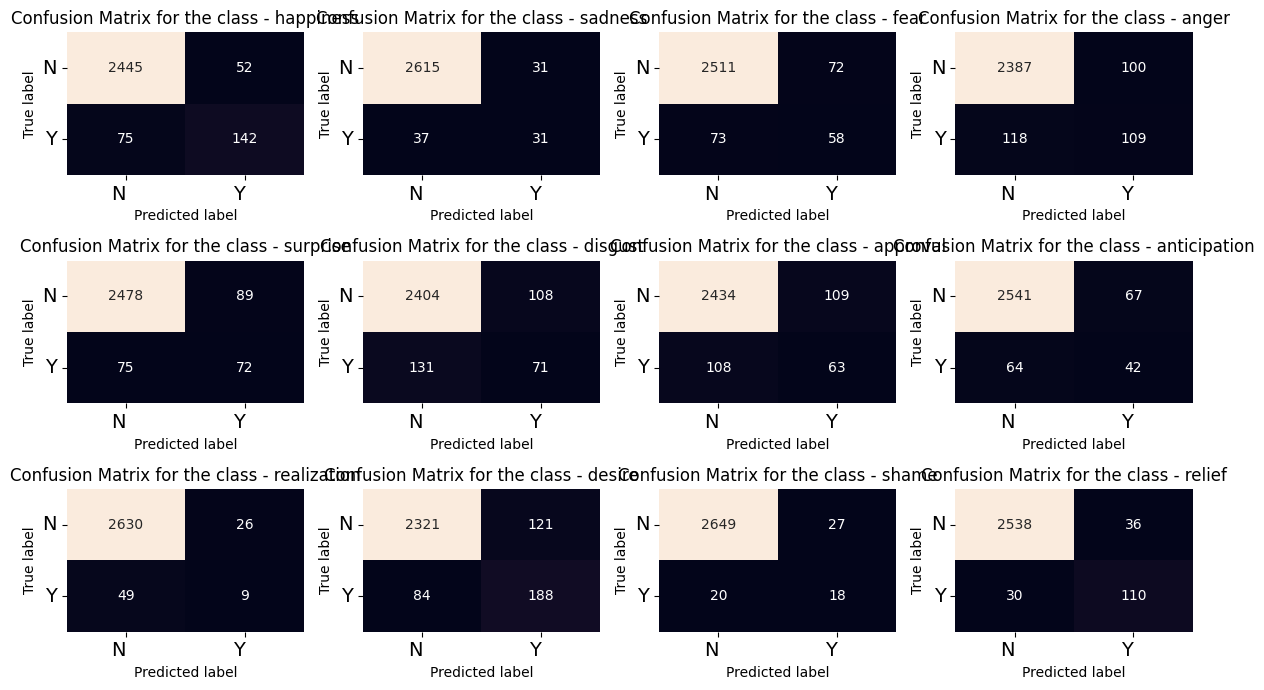

In [51]:
fig, ax = plt.subplots(3, 4, figsize=(12, 7))
    
for axes, cfs_matrix, label in zip(ax.flatten(), multilabel_conf_matrix, labels):
    print_confusion_matrix(cfs_matrix, axes, label, ["N", "Y"])
    
fig.tight_layout()
plt.show()

In [86]:
path_i = r"C:\Users\deepe\Downloads\testfile3.xlsx"

import pandas as pd

team_i = pd.read_excel(path_i)

In [90]:
list(team_i['Text'])

['I feel ecstatic about my recent achievement.',
 'Spending time with loved ones brings me immense joy.',
 "Opening a gift that I've been eagerly waiting for brings me joy.",
 'The laughter of children is infectious and makes me happy.',
 'I feel a deep sense of sadness when I think about lost opportunities.',
 "The news of a loved one's passing fills me with sorrow.",
 'Rainy days often evoke feelings of sadness in me.',
 'Ending a relationship can be a source of profound sadness.',
 'The loss of a beloved pet can bring tears to my eyes.',
 'Walking alone at night can evoke feelings of fear in me.',
 'The thought of public speaking fills me with anxiety and fear.',
 'Anticipating the start of a new season brings a sense of excitement.',
 'The anticipation of meeting someone for the first time makes me feel a mix of nerves and excitement.',
 'The realization that I had been neglecting my health hit me hard.',
 'I had a sudden realization about the importance of self-care.',
 'Horror mo